# Background information

#### The [Gaming Study Survey](https://osf.io/vnbxk/ "Click to learn more about the original study") is a dataset that explored possible correlations among gaming habits, various socio-economic factors, and various psychometric scales.

The survey assessed:

Background
1. Age and Gender
2. Country of origin
3. Country of residence
4. Employment status
5. Highest Degree earned

Gaming habits
1. Main game played (+ ranking, if applicable)
2. Hours played per week
3. Platform
4. Motivation (fun, improvement, competition,...)
5. Sociality (singleplayer, multiplayer, etc...)

Validated Psychometric Scales
1. [Social Phobia Inventory (SPIN)](https://www.brusheducation.ca/media/W1siZiIsIjIwMTYvMTEvMDkvNDMyMXcyMm1pdl9BcHBlbmRpeF9YWElJSV9Tb2NpYWxfUGhvYmlhX0ludmVudG9yeV9TUElOXy5wZGYiXV0/Appendix%20XXIII_Social%20Phobia%20Inventory%20%28SPIN%29.pdf?sha=1cbd318b09364dd1 "Check out the 17 questions here!")
2. [Generalized Anxiety Disorder Screener (GAD)](https://www.hiv.uw.edu/page/mental-health-screening/gad-7 "Check out the seven questions here!")
3. [Satisfaction with Life Scale (SWL)](https://fetzer.org/sites/default/files/images/stories/pdf/selfmeasures/SATISFACTION-SatisfactionWithLife.pdf "This scale is short and sweet!")
4. [Single Item Narcissism Scale (SINS)](https://osf.io/vyr5f/ "Check out section 6. Statistics")

## Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sweetviz as sv
import numpy as np
import scipy as scp
import statsmodels as sm
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.multivariate.manova import MANOVA
from statsmodels.formula.api import ols
import plotly.express as px
import plotly.graph_objects as px1
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
from bokeh.io import show
from bokeh.models import Button, CheckboxGroup, RadioGroup, CustomJS
from bokeh.io import show
from bokeh.models import CustomJS, Slider

## Importing Dataset

In [2]:
Gaming = pd.read_excel("C:/Users/Sgallego/Documents/DataScience/DataScienceCourse/10.FinalProject/Data/Final_Idea/GamingStudy_data.xlsx")

In [3]:
Gaming[Gaming.SPIN_T.isnull()]

,Unnamed: 0,Zeitstempel,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
7,8,42052.15930,0,0,0,0,0,0,0,NaN,...,USA,Japan,Reddit,Singleplayer,Accept,0,23,NaN,JPN,USA
36,37,42052.72080,1,1,0,0,0,1,1,Somewhat difficult,...,Greece,Greece,Reddit,Multiplayer - online - with real life friends,Accept,4,24,NaN,GRC,GRC
55,57,42052.89404,0,0,0,0,0,0,0,Not difficult at all,...,Bulgaria,UK,Reddit,Multiplayer - online - with real life friends,Accept,0,26,NaN,GBR,BGR
67,70,42053.07287,0,0,0,0,0,0,0,NaN,...,USA,USA,Reddit,Multiplayer - online - with real life friends,Accept,0,31,NaN,USA,USA
89,92,42053.82787,3,3,3,3,3,1,2,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,18,23,NaN,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13368,14154,42055.66921,0,0,0,0,0,2,0,Not difficult at all,...,UK,UK,Reddit,Multiplayer - online - with real life friends,Accept,2,32,NaN,GBR,GBR
13419,14205,42055.79394,3,3,2,2,2,1,1,Somewhat difficult,...,Sweden,Sweden,Reddit,Multiplayer - online - with real life friends,Accept,14,9,NaN,SWE,SWE
13435,14221,42056.00784,1,1,2,3,0,1,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with real life friends,Accept,8,20,NaN,USA,USA
13442,14228,42056.29025,0,0,0,0,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,1,22,NaN,USA,USA


In [4]:
Gaming.head(10)

,Unnamed: 0,Zeitstempel,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA
5,6,42052.13119,0,0,0,0,0,1,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with real life friends,Accept,1,17,13.0,USA,USA
6,7,42052.14622,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,16,26.0,USA,USA
7,8,42052.15930,0,0,0,0,0,0,0,NaN,...,USA,Japan,Reddit,Singleplayer,Accept,0,23,NaN,JPN,USA
8,9,42052.19737,2,3,2,2,0,1,2,Very difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,12,12,55.0,USA,USA
9,10,42052.22995,2,1,2,2,2,1,0,Somewhat difficult,...,Finland,Finland,Reddit,Multiplayer - online - with online acquaintanc...,Accept,10,13,26.0,FIN,FIN


## General Information about the Dataset

In [5]:
Gaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       13464 non-null  int64  
 1   Zeitstempel      13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

In [6]:
#Checking for missing values or cells with NAN/NA
Gaming.isnull().sum()

Unnamed: 0             0
Zeitstempel            0
GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
earnings               0
whyplay                0
League              1838
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175


In [7]:
#Checking for wrong entries like symbols -,?,#,*,etc.#
for col in Gaming.columns:
    print('{} : {}'.format(col,Gaming[col].unique()))

Unnamed: 0 : [    1     2     3 ... 14248 14249 14250]
Zeitstempel : [42052.00437 42052.0068  42052.0386  ... 42058.16964 42058.2442
 42058.36375]
GAD1 : [0 1 2 3]
GAD2 : [0 2 1 3]
GAD3 : [0 2 3 1]
GAD4 : [0 2 3 1]
GAD5 : [1 0 2 3]
GAD6 : [0 1 3 2]
GAD7 : [0 1 2 3]
GADE : ['Not difficult at all' 'Somewhat difficult' 'Very difficult' nan
 'Extremely difficult']
SWL1 : [3 2 5 7 6 1 4]
SWL2 : [5 6 2 4 3 7 1]
SWL3 : [5 2 4 3 6 7 1]
SWL4 : [5 2 3 6 1 7 4]
SWL5 : [5 1 2 3 7 6 4]
Game : ['Skyrim' 'Other' 'World of Warcraft' 'League of Legends' 'Starcraft 2'
 'Counter Strike' 'Destiny' 'Diablo 3' 'Heroes of the Storm' 'Hearthstone'
 'Guild Wars 2']
Platform : ['Console (PS, Xbox, ...)' 'PC' 'Smartphone / Tablet']
Hours : [1.50e+01 8.00e+00 0.00e+00 2.00e+01 4.00e+00 3.00e+01 2.50e+01 2.00e+00
 1.40e+01 1.00e+01 6.00e+00 7.00e+00 6.00e+01 2.10e+01 5.00e+00 4.00e+01
 9.00e+00 1.80e+01 1.20e+01      nan 1.10e+01 1.00e+00 4.50e+01 1.60e+01
 5.00e+01 2.80e+01 4.20e+01 8.00e+01 1.70e+01 1.30e+01 3.5

## Summary of Exploratory Data Analysis

In [8]:
#Going to use Sweetviz to visualize values and compare datasets#
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
sweet_report = sv.analyze(Gaming.select_dtypes(include=numerics))
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Observations
According to the sweet_report, there is positive relationship between gamers that scored high on their GAD and SPIN questions, while gamers that scored higher on SWL questions scored lower in GAD and SPIN. There appears to be no relationship between the pyschometrics scales previously mentioned and the SINS. 

According to the sweet_report, there is a positive relationship between number of hours played and number of streaming hours indicated.

In [9]:
#Exploring the categorical variables
##Gender, Work, Degree, Birthplace, Residence, Game, Platform, Earnings, Whyplay, League, Reference, and Playstyle" 

In [10]:
Gaming.Gender.value_counts()

Male      12699
Female      713
Other        52
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='GAD_T'>

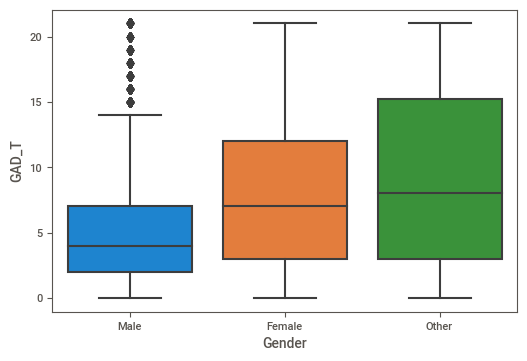

In [11]:
sns.boxplot(data=Gaming, x="Gender", y="GAD_T")

<AxesSubplot:xlabel='Gender', ylabel='SPIN_T'>

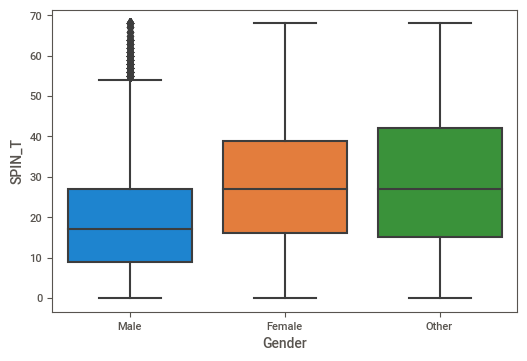

In [12]:
sns.boxplot(data=Gaming, x="Gender", y="SPIN_T")

<AxesSubplot:xlabel='Gender', ylabel='SWL_T'>

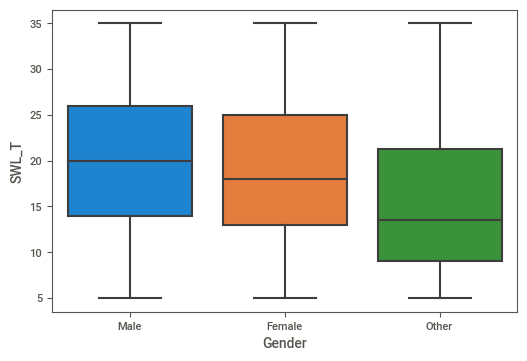

In [13]:
sns.boxplot(data=Gaming, x="Gender", y="SWL_T")

<AxesSubplot:xlabel='Gender', ylabel='Narcissism'>

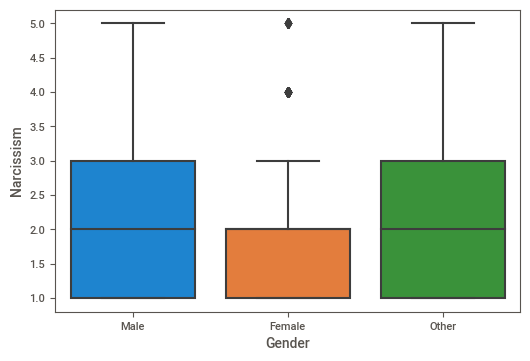

In [14]:
sns.boxplot(data=Gaming, x="Gender", y="Narcissism")

<AxesSubplot:xlabel='Gender', ylabel='Hours'>

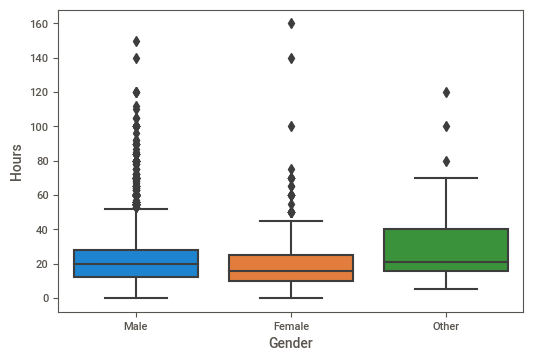

In [15]:
sns.boxplot(data=Gaming[Gaming["Hours"]<400], x="Gender", y="Hours")

<AxesSubplot:xlabel='Gender', ylabel='streams'>

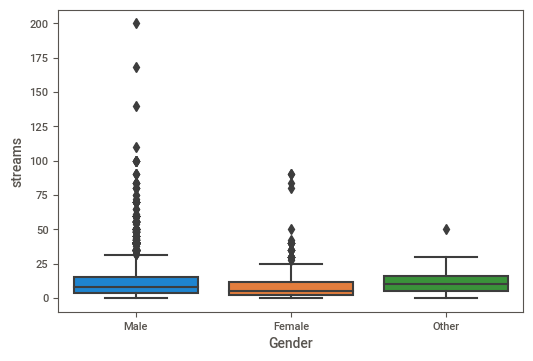

In [16]:
sns.boxplot(data=Gaming[Gaming["streams"]<400], x="Gender", y="streams")

#### Observations
People who identify as Other tend to have higher scores of GAD and SPIN as well as spent more hours playing than people who identify as Female or Male

In [17]:
Gaming.Work.value_counts()

Student at college / university    7073
Employed                           2734
Student at school                  2229
Unemployed / between jobs          1390
Name: Work, dtype: int64

<AxesSubplot:xlabel='Work', ylabel='GAD_T'>

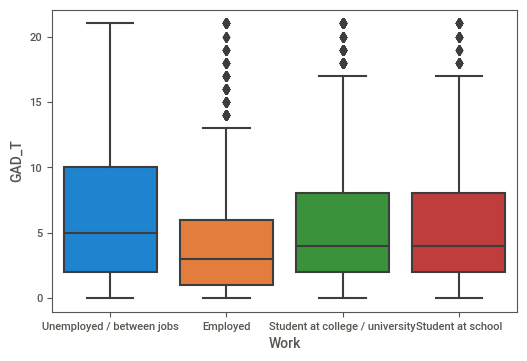

In [18]:
sns.boxplot(data=Gaming, x="Work", y="GAD_T")

<AxesSubplot:xlabel='Work', ylabel='SPIN_T'>

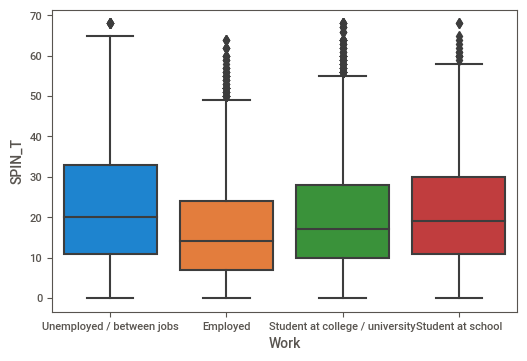

In [19]:
sns.boxplot(data=Gaming, x="Work", y="SPIN_T")

<AxesSubplot:xlabel='Work', ylabel='SWL_T'>

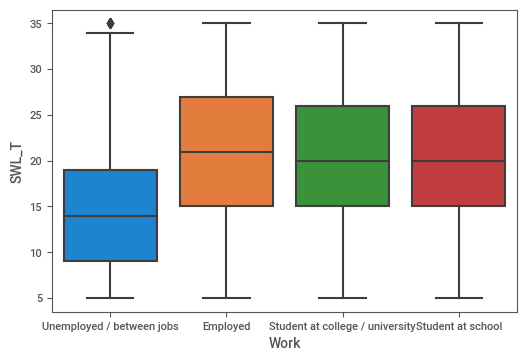

In [20]:
sns.boxplot(data=Gaming, x="Work", y="SWL_T")

<AxesSubplot:xlabel='Work', ylabel='Narcissism'>

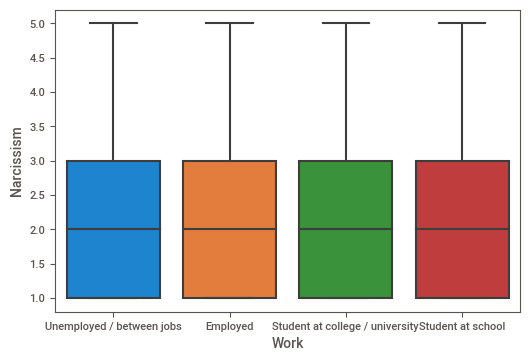

In [21]:
sns.boxplot(data=Gaming, x="Work", y="Narcissism")

<AxesSubplot:xlabel='Work', ylabel='Hours'>

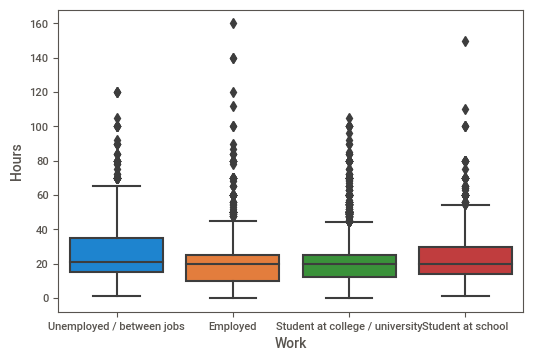

In [22]:
sns.boxplot(data=Gaming[Gaming["Hours"]<400], x="Work", y="Hours")

<AxesSubplot:xlabel='Work', ylabel='streams'>

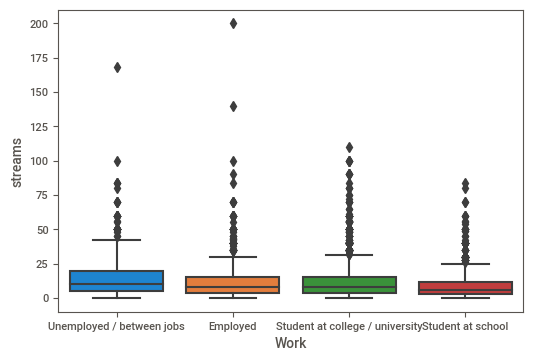

In [23]:
sns.boxplot(data=Gaming[Gaming["streams"]<400], x="Work", y="streams")

#### Observation
People who are unemployed tend to have higher scores of GAD and SPIN as well as spent more hours playing than people who are at school or are employed. People who are employed have higher SWL scores and play less than all other categories.

In [24]:
Gaming.Degree.value_counts()

High school diploma (or equivalent)    8560
Bachelor (or equivalent)               2687
None                                   1577
Master (or equivalent)                  546
Ph.D., Psy. D., MD (or equivalent)       94
Name: Degree, dtype: int64

<AxesSubplot:xlabel='GAD_T', ylabel='Degree'>

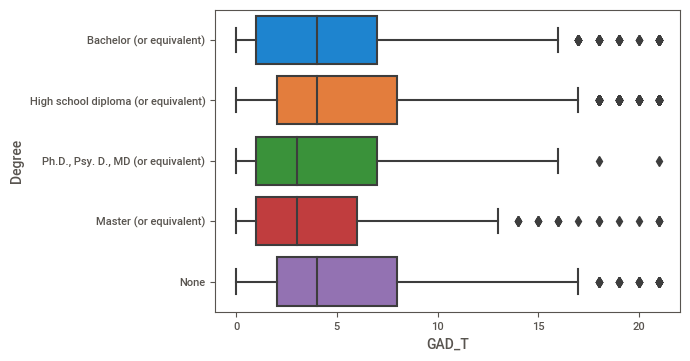

In [25]:
sns.boxplot(data=Gaming, x="GAD_T", y="Degree")

<AxesSubplot:xlabel='SPIN_T', ylabel='Degree'>

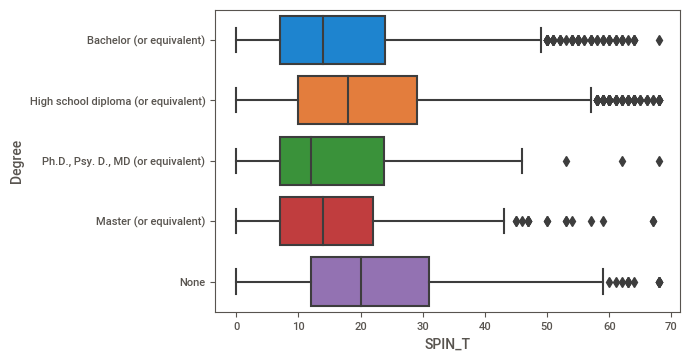

In [26]:
sns.boxplot(data=Gaming, x="SPIN_T", y="Degree")

<AxesSubplot:xlabel='SWL_T', ylabel='Degree'>

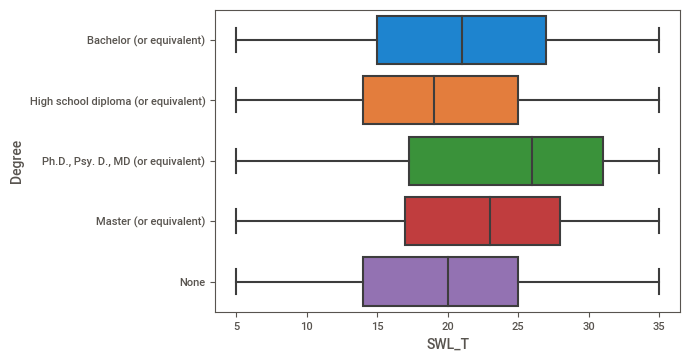

In [27]:
sns.boxplot(data=Gaming, x="SWL_T", y="Degree")

<AxesSubplot:xlabel='Narcissism', ylabel='Degree'>

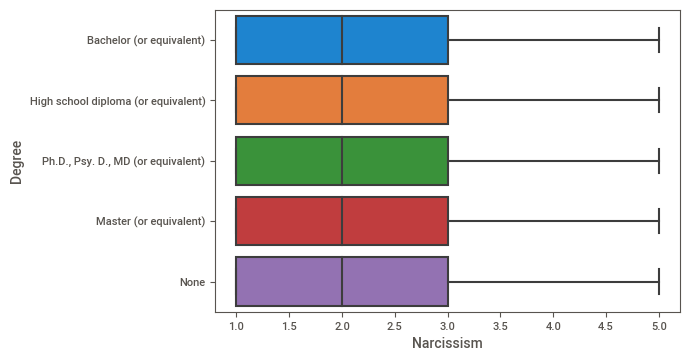

In [28]:
sns.boxplot(data=Gaming, x="Narcissism", y="Degree")

<AxesSubplot:xlabel='Hours', ylabel='Degree'>

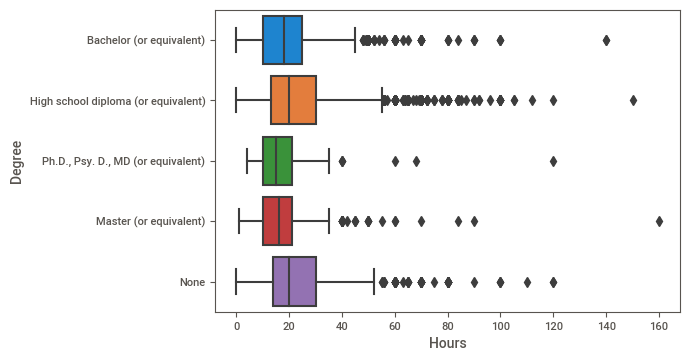

In [29]:
sns.boxplot(data=Gaming[Gaming["Hours"]<400], x="Hours", y="Degree")

<AxesSubplot:xlabel='streams', ylabel='Degree'>

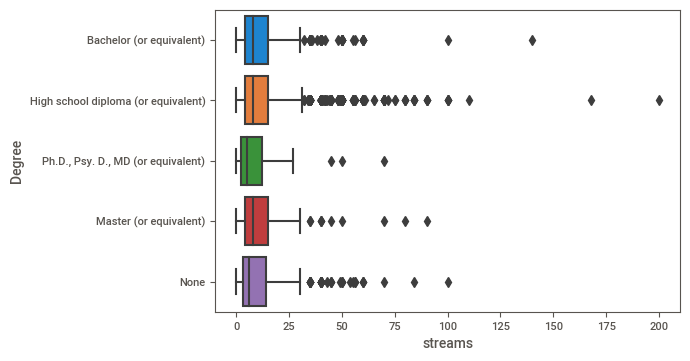

In [30]:
sns.boxplot(data=Gaming[Gaming["streams"]<400], x="streams", y="Degree")

#### Observation
People who have a high school degree or no degree higher scores of GAD and SPIN as well as spent more hours playing than people who have a secondary education degree(s).

In [31]:
Gaming.Birthplace.value_counts()

USA              4261
Germany          1376
UK                940
Canada            842
Netherlands       503
                 ... 
Liechtenstein       1
St Vincent          1
Gibraltar           1
Brunei              1
Macau               1
Name: Birthplace, Length: 126, dtype: int64

In [32]:
Gaming.Residence.value_counts()

USA              4569
Germany          1413
UK               1032
Canada            994
Netherlands       506
                 ... 
Jamaica             1
Liechtenstein       1
Indonesia           1
Kazakhstan          1
Palestine           1
Name: Residence, Length: 109, dtype: int64

In [33]:
Gaming.groupby(['Residence']).size().nlargest(20) #If it's not in this list than other... create#

Residence
USA            4569
Germany        1413
UK             1032
Canada          994
Netherlands     506
France          391
Sweden          379
Denmark         254
Brazil          253
Australia       245
Poland          243
Portugal        229
Spain           203
Norway          193
Belgium         189
Finland         183
Austria         149
Italy           126
Unknown         109
Argentina       104
dtype: int64

In [34]:
Gaming.Game.value_counts()

League of Legends      11314
Other                   1021
Starcraft 2              345
Counter Strike           318
World of Warcraft        152
Hearthstone              101
Diablo 3                  89
Heroes of the Storm       41
Guild Wars 2              37
Skyrim                    28
Destiny                   18
Name: Game, dtype: int64

<AxesSubplot:xlabel='GAD_T', ylabel='Game'>

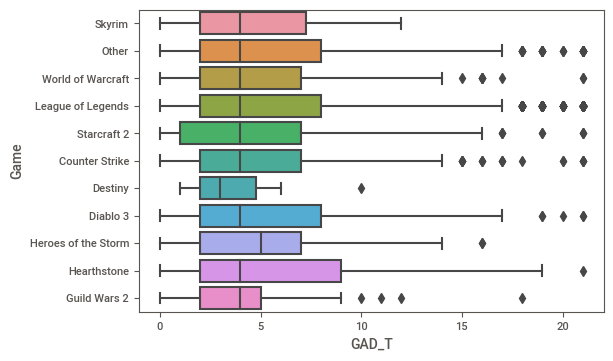

In [35]:
sns.boxplot(data=Gaming, x="GAD_T", y="Game")

<AxesSubplot:xlabel='SPIN_T', ylabel='Game'>

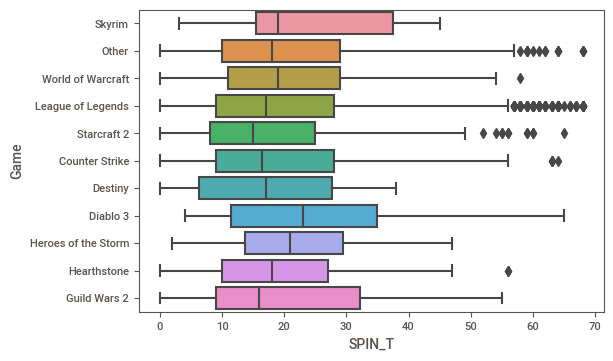

In [36]:
sns.boxplot(data=Gaming, x="SPIN_T", y="Game")

<AxesSubplot:xlabel='SWL_T', ylabel='Game'>

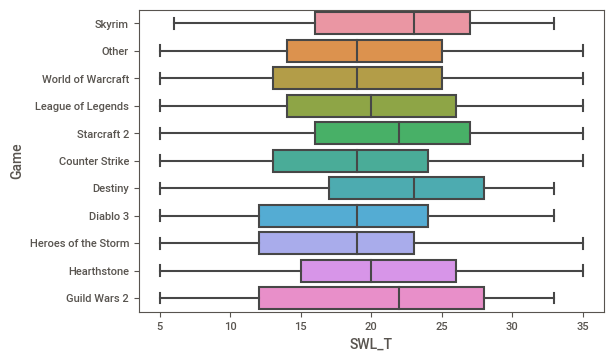

In [37]:
sns.boxplot(data=Gaming, x="SWL_T", y="Game")

<AxesSubplot:xlabel='Narcissism', ylabel='Game'>

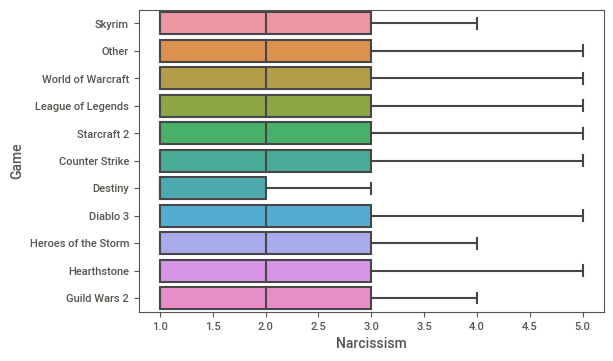

In [38]:
sns.boxplot(data=Gaming, x="Narcissism", y="Game")

<AxesSubplot:xlabel='Hours', ylabel='Game'>

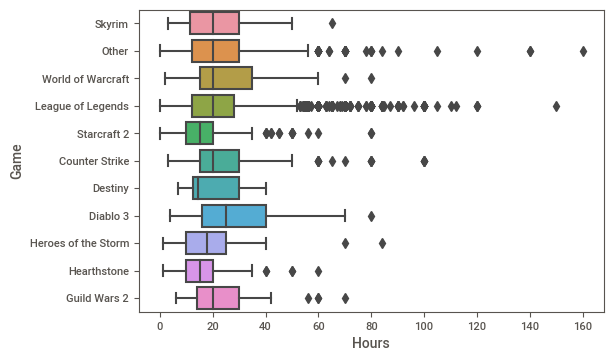

In [39]:
sns.boxplot(data=Gaming[Gaming["Hours"]<400], x="Hours", y="Game")

<AxesSubplot:xlabel='streams', ylabel='Game'>

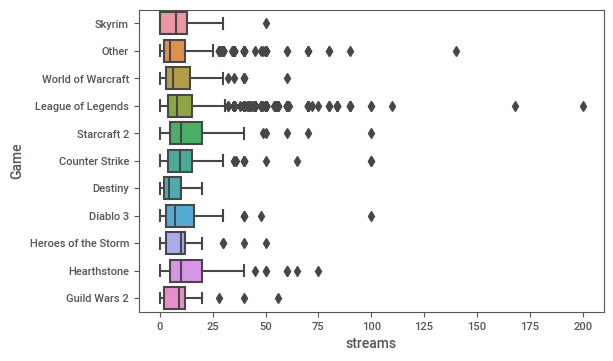

In [40]:
sns.boxplot(data=Gaming[Gaming["streams"]<400], x="streams", y="Game")

#### Observation
No game seems to show a significant relationship with psychometric scales or hours playing/streaming

In [41]:
Gaming.Platform.value_counts()

PC                         13219
Console (PS, Xbox, ...)      222
Smartphone / Tablet           23
Name: Platform, dtype: int64

<AxesSubplot:xlabel='GAD_T', ylabel='Platform'>

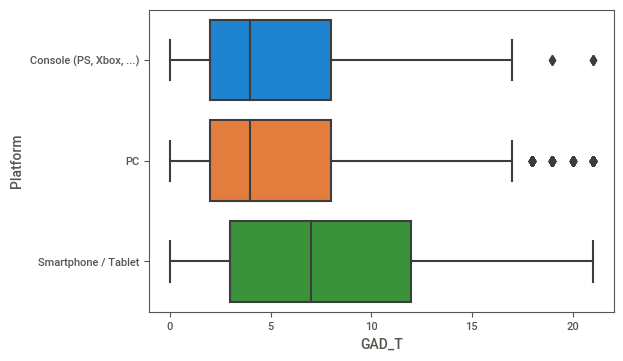

In [42]:
sns.boxplot(data=Gaming, x="GAD_T", y="Platform")

<AxesSubplot:xlabel='SPIN_T', ylabel='Platform'>

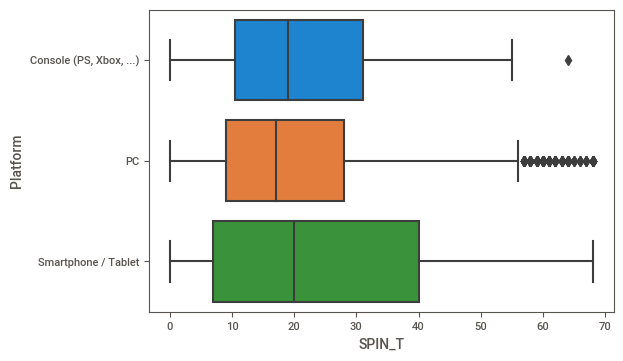

In [43]:
sns.boxplot(data=Gaming, x="SPIN_T", y="Platform")

<AxesSubplot:xlabel='SWL_T', ylabel='Platform'>

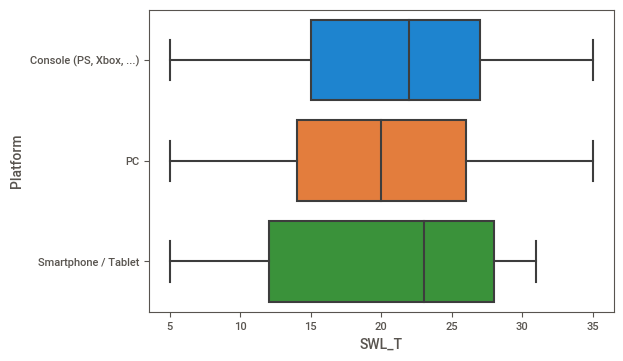

In [44]:
sns.boxplot(data=Gaming, x="SWL_T", y="Platform")

<AxesSubplot:xlabel='Narcissism', ylabel='Platform'>

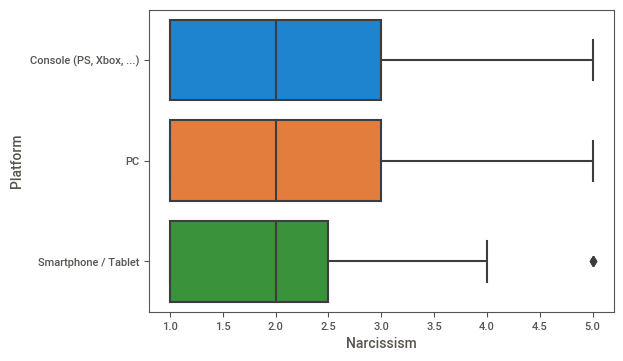

In [45]:
sns.boxplot(data=Gaming, x="Narcissism", y="Platform")

<AxesSubplot:xlabel='Hours', ylabel='Platform'>

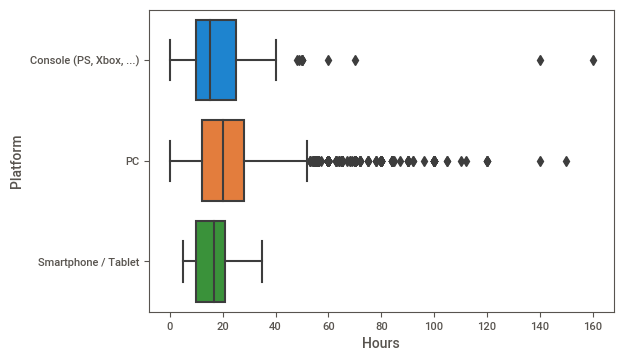

In [46]:
sns.boxplot(data=Gaming[Gaming["Hours"]<400], x="Hours", y="Platform")

<AxesSubplot:xlabel='streams', ylabel='Platform'>

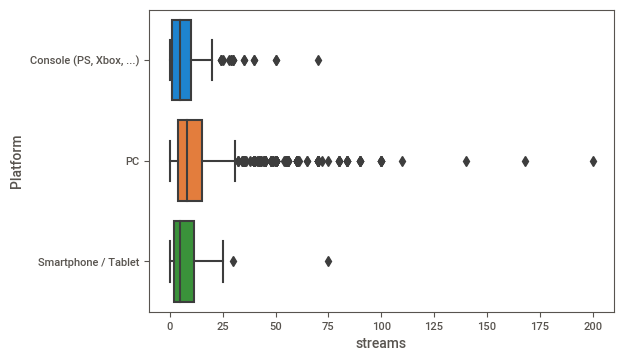

In [47]:
sns.boxplot(data=Gaming[Gaming["streams"]<400], x="streams", y="Platform")

#### Observation
People who play on a smartphone/tablet GAD and SPIN than people who play on their PC or console, but they don't play as many hours.

In [48]:
Gaming.earnings.value_counts()  

I play for fun                                                                               12112
I play mostly for fun but earn a little on the side (tournament winnings, streaming, etc)      990
I earn a living by playing this game                                                            48
I play to win                                                                                    3
i try                                                                                            2
                                                                                             ...  
I play for fun, but if there's an opportunity to earn some money, I would love to.               1
Keep in touch w/ friends                                                                         1
I Play for fun and working on making earn out of it.                                             1
I play ranked mostly                                                                             1
Strive to 

In [49]:
Gaming.whyplay.value_counts()    #explore with the psychometrics#

having fun                                                                          5289
improving                                                                           4927
winning                                                                             2091
relaxing                                                                             654
All of the above                                                                      26
                                                                                    ... 
Making my brain go numb                                                                1
Combination: Winning / Having fun                                                      1
Improving + Fun                                                                        1
to be occupied                                                                         1
Mental priority is Fun>Improve>Win, actual priority once in game Win>Improve>Fun       1
Name: whyplay, Length

In [50]:
Gaming.League.value_counts()

Gold                                                 970
Silver                                               650
Platinum                                             635
Diamond                                              549
gold                                                 316
                                                    ... 
in cs:go double ak, in league gold                     1
Silver 1 (CS) Silver 5 (lol)                           1
Not played ranked yet, was Platinum 2 last season      1
Top team(DP2), Plat 3(LoL)                             1
AHGL                                                   1
Name: League, Length: 1455, dtype: int64

In [51]:
Gaming.Reference.value_counts()

Reddit            13324
Other                67
TeamLiquid.net       55
CrowdFlower           3
Name: Reference, dtype: int64

<AxesSubplot:xlabel='Narcissism', ylabel='Reference'>

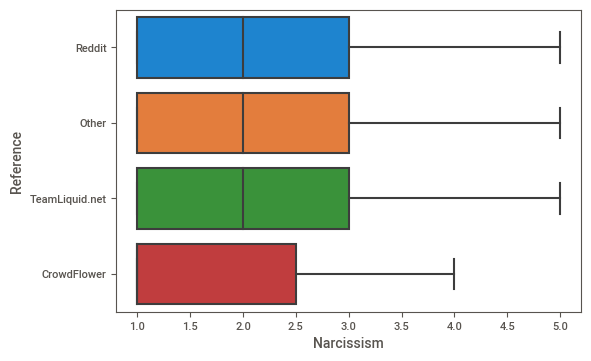

In [52]:
sns.boxplot(data=Gaming, x="Narcissism", y="Reference")

<AxesSubplot:xlabel='GAD_T', ylabel='Reference'>

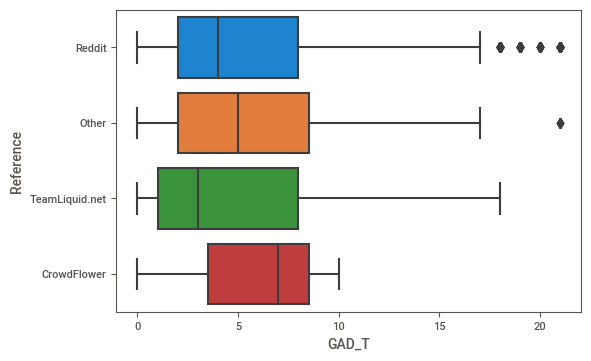

In [53]:
sns.boxplot(data=Gaming, x="GAD_T", y="Reference")

<AxesSubplot:xlabel='SPIN_T', ylabel='Reference'>

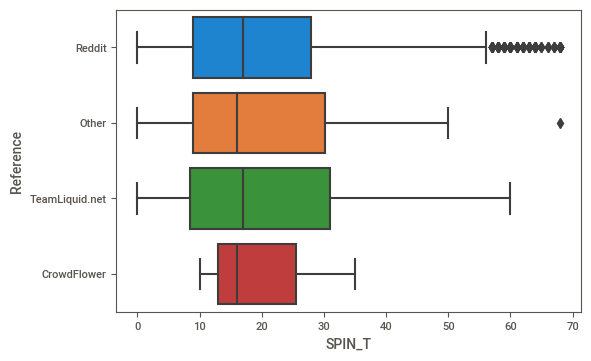

In [54]:
sns.boxplot(data=Gaming, x="SPIN_T", y="Reference")

<AxesSubplot:xlabel='SWL_T', ylabel='Reference'>

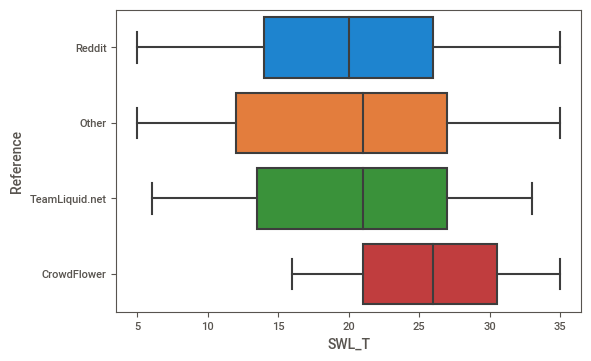

In [55]:
sns.boxplot(data=Gaming, x="SWL_T", y="Reference")

<AxesSubplot:xlabel='Hours', ylabel='Reference'>

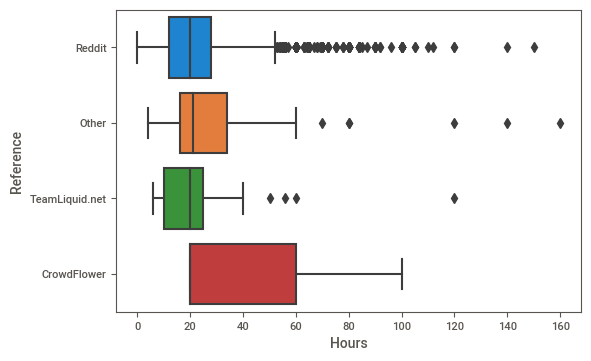

In [56]:
sns.boxplot(data=Gaming[Gaming["Hours"]<400], x="Hours", y="Reference")

<AxesSubplot:xlabel='streams', ylabel='Reference'>

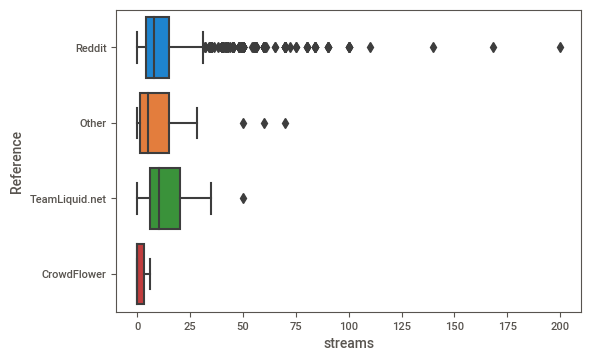

In [57]:
sns.boxplot(data=Gaming[Gaming["streams"]<400], x="streams", y="Reference")

#### Observation
People who learned about the survey through CrowdFlower scored higher on the SWL than other references.

In [58]:
Gaming.Playstyle.value_counts()

Multiplayer - online - with real life friends                                   5564
Multiplayer - online - with strangers                                           4134
Multiplayer - online - with online acquaintances or teammates                   2652
Singleplayer                                                                     762
Multiplayer - offline (people in the same room)                                   48
                                                                                ... 
Online with friends, both real life friends and friends I've made online.          1
Multiplayer - online - with strangers against A.I.                                 1
Multiplayer equally with strangers or real life friends                            1
with friend and stragers in same team                                              1
I usually play online with my real life friends and the internet ones alike.       1
Name: Playstyle, Length: 298, dtype: int64

C:\Users\Sgallego\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

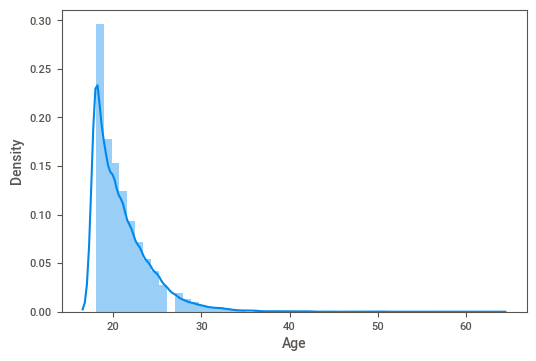

In [59]:
sns.distplot(Gaming['Age'])

<AxesSubplot:xlabel='Age', ylabel='GAD_T'>

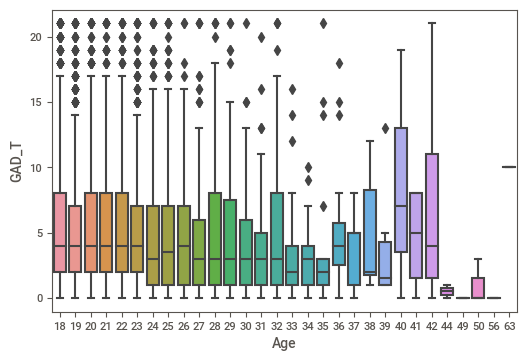

In [60]:
sns.boxplot(data=Gaming, x="Age", y="GAD_T")

<AxesSubplot:xlabel='Age', ylabel='SPIN_T'>

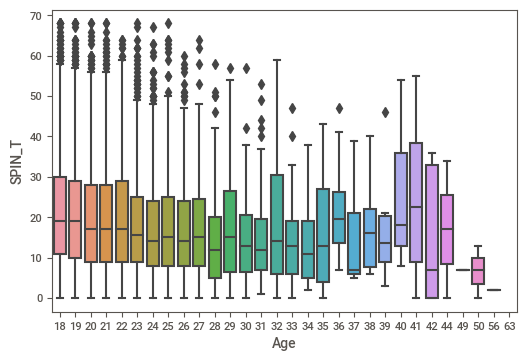

In [61]:
sns.boxplot(data=Gaming, x="Age", y="SPIN_T")

<AxesSubplot:xlabel='Age', ylabel='SWL_T'>

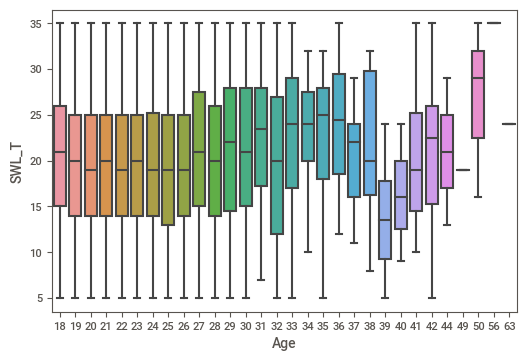

In [62]:
sns.boxplot(data=Gaming, x="Age", y="SWL_T")

<AxesSubplot:xlabel='Age', ylabel='Narcissism'>

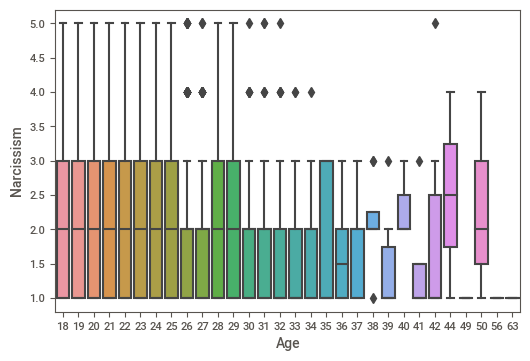

In [63]:
sns.boxplot(data=Gaming, x="Age", y="Narcissism")

<AxesSubplot:xlabel='Age', ylabel='Hours'>

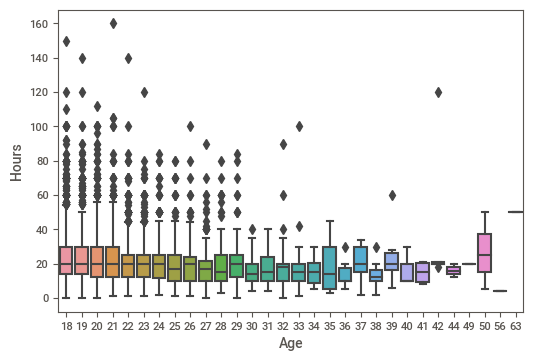

In [64]:
sns.boxplot(data=Gaming[Gaming["Hours"]<400], x="Age", y="Hours")

<AxesSubplot:xlabel='Age', ylabel='streams'>

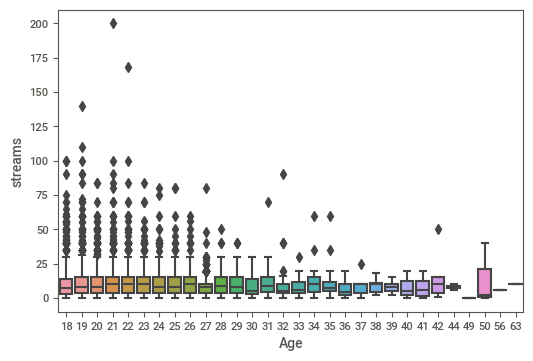

In [65]:
sns.boxplot(data=Gaming[Gaming["streams"]<400], x="Age", y="streams")

#### Observation
There seems to be a slight increase of higher scores among people in their 40s in SPIN and GAD. Regarding SWL scores this group scores less than the younger ages.

## Data Wrangling

In [66]:
Gaming_new = Gaming.copy()  #Need to create a copy of dataset                            
print(Gaming_new)   

       Unnamed: 0  Zeitstempel  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  \
0               1  42052.00437     0     0     0     0     1     0     0   
1               2  42052.00680     1     2     2     2     0     1     0   
2               3  42052.03860     0     2     2     0     0     3     1   
3               4  42052.06804     0     0     0     0     0     0     0   
4               5  42052.08948     2     1     2     2     2     3     2   
...           ...          ...   ...   ...   ...   ...   ...   ...   ...   
13459       14246  42057.75678     1     0     0     1     0     1     1   
13460       14247  42057.81185     3     3     3     3     2     3     3   
13461       14248  42058.16964     0     0     0     0     0     0     0   
13462       14249  42058.24420     3     2     1     3     0     1     3   
13463       14250  42058.36375     1     1     0     0     0     0     0   

                       GADE  ...  Birthplace    Residence  Reference  \
0      Not diff

In [67]:
Gaming_new.head()

,Unnamed: 0,Zeitstempel,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [68]:
#Dropping unwanted columns. They are either timestamp or a repetition of another column.
columns1 = ['Unnamed: 0','Zeitstempel','accept','Residence_ISO3','Birthplace_ISO3']
Gaming_new.drop(columns1, inplace=True, axis=1)

In [69]:
#Dropping unwanted columns that are beyond the scope of this data analysis. 
#Narcissism did not seem statistically significant.
columns2 = ["League","highestleague","earnings","whyplay","Playstyle", "Birthplace"]
Gaming_new.drop(columns2, inplace=True, axis=1)

In [70]:
#Dropping unwanted columns. Narcissism did not seem statistically significant in EDA, and SPIN will not be analized for this project.
columns2 = ["Narcissism", "SPIN1", "SPIN2", "SPIN3", "SPIN4", "SPIN5", "SPIN6", "SPIN7", "SPIN8", "SPIN9", "SPIN10", "SPIN11", "SPIN12", "SPIN13", "SPIN14", "SPIN15", "SPIN16", "SPIN17", "SPIN_T"]
Gaming_new.drop(columns2, inplace=True, axis=1)

In [71]:
def recode(series):            #Replace values with numbers for GADE
    if series == 'Not difficult at all':
        return 1
    if series == 'Somewhat difficult':
        return 2
    if series == 'Very difficult':
        return 3
    if series == 'Extremely difficult':
        return 4
Gaming_new['GADER'] = Gaming_new['GADE'].apply(recode)

In [72]:
def recode(series):            #Replace values with numbers for Gender
    if series == 'Male':
        return 0
    if series == 'Female':
        return 1
    if series == 'Other':
        return 2
Gaming_new['GenderR'] = Gaming_new['Gender'].apply(recode)

In [73]:
def recode(series):            #Replace values with numbers for Reference
    if series == 'Reddit':
        return 1
    if series == 'TeamLiquid.net':
        return 2
    if series == 'CrowdFlower':
        return 3
    if series == 'Other':
        return 4
Gaming_new['ReferenceR'] = Gaming_new['Reference'].apply(recode)

In [74]:
def recode(series):            #Replace values with numbers for Work
    if series == 'Employed':
        return 1
    if series == 'Student at college / university':
        return 2
    if series == 'Student at school':
        return 3
    if series == 'Unemployed / between jobs':
        return 4
Gaming_new['WorkR'] = Gaming_new['Work'].apply(recode)

In [75]:
def recode(series):            #Replace values with numbers for Degree
    if series == 'None':
        return 0
    if series == 'High school diploma (or equivalent)':
        return 1
    if series == 'Bachelor (or equivalent)':
        return 2
    if series == 'Master (or equivalent)':
        return 3
    if series == 'Ph.D., Psy. D., MD (or equivalent)':
        return 4
Gaming_new['DegreeR'] = Gaming_new['Degree'].apply(recode)

In [76]:
def recode(series):       #Recode Residence for possible need in analysis
    if series == 'USA':
        return 1
    if series == 'Germany':
        return 2
    if series == 'UK':
        return 3
    if series == 'Canada':
        return 4
    if series == 'Netherlands':
        return 5
    if series == 'France':
        return 6
    if series == 'Sweden':
        return 7
    if series == 'Denmark':
        return 8
    if series == 'Brazil':
        return 9
    if series == 'Australia':
        return 10
    if series == 'Poland':
        return 11
    if series == 'Portugal':
        return 12
    if series == 'Spain':
        return 13
    if series == 'Norway':
        return 14
    if series == 'Belgium':
        return 15
    if series == 'South Korea':
        return 16
    if series == 'Japan':
        return 17
    if series == 'Finland':
        return 18
    if series == 'Bosnia and Herzegovina':
        return 19
    if series == 'Ireland':
        return 20
    if series == 'Malaysia':
        return 21
    if series == 'Romania':
        return 22
    if series == 'Turkey':
        return 23
    if series == 'Latvia':
        return 24
    if series == 'Austria':
        return 25
    if series == 'South Africa':
        return 26
    if series == 'Croatia':
        return 27
    if series == 'Switzerland':
        return 28
    if series == 'India':
        return 29
    if series == 'Argentina':
        return 30
    if series == 'Estonia':
        return 31
    if series == 'Russia':
        return 32
    if series == 'Czech Republic':
        return 33
    if series == 'Lithuania':
        return 34
    if series == 'Singapore':
        return 35
    if series == 'China':
        return 36
    if series == 'Unknown':
        return 37
    if series == 'Serbia':
        return 38
    if series == 'Morocco':
        return 39
    if series == 'Saudi Arabia':
        return 40
    if series == 'Slovakia':
        return 41
    if series == 'Bulgaria':
        return 42
    if series == 'Italy':
        return 43
    if series == 'Slovenia':
        return 44
    if series == 'Jordan':
        return 45
    if series == 'Venezuela':
        return 46
    if series == 'Tunisia':
        return 47
    if series == 'Israel':
        return 48
    if series == 'Qatar':
        return 49
    if series == 'Ukraine':
        return 50
    if series == 'Mexico':
        return 51
    if series == 'Macedonia':
        return 52
    if series == 'Philippines':
        return 53
    if series == 'Hungary':
        return 54
    if series == 'Egypt':
        return 55
    if series == 'Iceland':
        return 56
    if series == 'New Zealand':
        return 57
    if series == 'Luxembourg':
        return 58
    if series == 'Cyprus':
        return 59
    if series == 'Algeria':
        return 60
    if series == 'UAE':
        return 61
    if series == 'Belarus':
        return 62
    if series == 'Chile':
        return 63
    if series == 'Lebanon':
        return 64
    if series == 'Thailand':
        return 65
    if series == 'Peru':
        return 66
    if series == 'Namibia':
        return 67
    if series == 'Uruguay':
        return 68
    if series == 'Kuwait':
        return 69
    if series == 'Bangladesh':
        return 70
    if series == 'Malta':
        return 71
    if series == 'Syria':
        return 72
    if series == 'Colombia':
        return 73
    if series == 'Dominican Republic':
        return 74
    if series == 'Nicaragua':
        return 75
    if series == 'Hong Kong':
        return 76
    if series == 'Vietnam':
        return 77
    if series == 'Kazakhstan':
        return 78
    if series == 'Albania':
        return 79
    if series == 'Guadeloupe':
        return 80
    if series == 'Grenada':
        return 81
    if series == 'Trinidad & Tobago':
        return 82
    if series == 'Panama':
        return 83
    if series == 'Indonesia':
        return 84
    if series == 'Liechtenstein':
        return 85
    if series == 'Puerto Rico':
        return 86
    if series == 'Taiwan':
        return 87
    if series == 'Costa Rica':
        return 88
    if series == 'Belize':
        return 89
    if series == 'Jamaica':
        return 90
    if series == 'Georgia':
        return 91
    if series == 'Faroe Islands':
        return 92
    if series == 'Guatemala':
        return 93
    if series == 'Moldova':
        return 94
    if series == 'Mongolia':
        return 95
    if series == 'Honduras':
        return 96
    if series == 'Montenegro':
        return 97
    if series == 'Bahrain':
        return 98
    if series == 'Bolivia':
        return 99
    if series == 'El Salvador':
        return 100
    if series == 'Ecuador':
        return 101
    if series == 'Pakistan':
        return 102
    if series == 'Republic of Kosovo':
        return 103
    if series == 'St Vincent':
        return 104
    if series == 'Brunei':
        return 105
    if series == 'Fiji':
        return 106
    if series == 'Gibraltar':
        return 107
    if series == 'Palestine':
        return 108
    
Gaming_new['ResidenceR'] = Gaming_new['Residence'].apply(recode)

In [77]:
def recode(series):            #Recode Game for possible need in analysis
    if series == 'Skyrim':
        return 1
    if series == 'World of Warcraft':
        return 2
    if series == 'Starcraft 2':
        return 3
    if series == 'League of Legends':
        return 4
    if series == 'Counter Strike':
        return 5
    if series == 'Destiny':
        return 6
    if series == 'Diablo 3':
        return 7
    if series == 'Heroes of the Storm':
        return 8
    if series == 'Hearthstone':
        return 9
    if series == 'Guild Wars 2':
        return 10
    if series == 'Other':
        return 11
Gaming_new['GameR'] = Gaming_new['Game'].apply(recode)

In [78]:
def recode(series):      #Recode Platform for possible need in analysis
    if series == 'Console (PS, Xbox, ...)':
        return 1
    if series == 'PC':
        return 2
    if series == 'Smartphone / Tablet':
        return 3
Gaming_new['PlatformR'] = Gaming_new['Platform'].apply(recode)

In [79]:
def recode(series):  #Recode Gender for final visualization
    if series == 'Male':
        return 'Male'
    if series == 'Female':
        return 'Female'
    if series == 'Other':
        return 'Non-Binary'
Gaming_new['Gender Group'] = Gaming_new['Gender'].apply(recode)

In [80]:
Gaming_Final = Gaming_new.dropna() #Dropped all rows with NAs

In [81]:
#Checking changes
Gaming_Final.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,SWL_T,GADER,GenderR,ReferenceR,WorkR,DegreeR,ResidenceR,GameR,PlatformR,Gender Group
0,0,0,0,0,1,0,0,Not difficult at all,3,5,...,23,1.0,0,1.0,4.0,2,1.0,1,1,Male
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,...,16,2.0,0,1.0,4.0,2,1.0,11,2,Male
2,0,2,2,0,0,3,1,Not difficult at all,2,6,...,17,1.0,1,1.0,1.0,2,2.0,11,2,Female
3,0,0,0,0,0,0,0,Not difficult at all,2,5,...,17,1.0,0,1.0,1.0,2,1.0,11,2,Male
4,2,1,2,2,2,3,2,Very difficult,2,2,...,14,3.0,0,1.0,1.0,1,16.0,11,1,Male


In [82]:
#Checking changes
Gaming_Final.isnull().sum()

GAD1            0
GAD2            0
GAD3            0
GAD4            0
GAD5            0
GAD6            0
GAD7            0
GADE            0
SWL1            0
SWL2            0
SWL3            0
SWL4            0
SWL5            0
Game            0
Platform        0
Hours           0
streams         0
Gender          0
Age             0
Work            0
Degree          0
Residence       0
Reference       0
GAD_T           0
SWL_T           0
GADER           0
GenderR         0
ReferenceR      0
WorkR           0
DegreeR         0
ResidenceR      0
GameR           0
PlatformR       0
Gender Group    0
dtype: int64

In [83]:
#Checking for wrong entries like symbols -,?,#,*,etc.#
for col in Gaming_Final.columns:
    print('{} : {}'.format(col,Gaming_Final[col].unique()))

GAD1 : [0 1 2 3]
GAD2 : [0 2 1 3]
GAD3 : [0 2 3 1]
GAD4 : [0 2 3 1]
GAD5 : [1 0 2 3]
GAD6 : [0 1 3 2]
GAD7 : [0 1 2 3]
GADE : ['Not difficult at all' 'Somewhat difficult' 'Very difficult'
 'Extremely difficult']
SWL1 : [3 2 5 6 1 4 7]
SWL2 : [5 6 2 4 3 7 1]
SWL3 : [5 2 4 3 6 1 7]
SWL4 : [5 2 3 6 1 7 4]
SWL5 : [5 1 2 3 4 6 7]
Game : ['Skyrim' 'Other' 'World of Warcraft' 'Starcraft 2' 'League of Legends'
 'Counter Strike' 'Destiny' 'Diablo 3' 'Heroes of the Storm' 'Hearthstone'
 'Guild Wars 2']
Platform : ['Console (PS, Xbox, ...)' 'PC' 'Smartphone / Tablet']
Hours : [1.50e+01 8.00e+00 0.00e+00 2.00e+01 4.00e+00 3.00e+01 2.00e+00 2.50e+01
 1.40e+01 1.00e+01 6.00e+00 7.00e+00 6.00e+01 2.10e+01 5.00e+00 4.00e+01
 9.00e+00 1.80e+01 1.20e+01 1.10e+01 1.00e+00 4.50e+01 1.60e+01 5.00e+01
 2.80e+01 4.20e+01 8.00e+01 1.70e+01 1.30e+01 3.50e+01 7.00e+01 2.40e+01
 2.70e+01 3.00e+00 4.80e+01 4.90e+01 2.20e+01 5.50e+01 2.90e+01 6.50e+01
 3.90e+01 4.70e+01 1.20e+02 7.50e+01 1.00e+02 5.60e+01 3.40e+01

In [84]:
Gaming_Final.info() #Final data has 12,491 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12491 entries, 0 to 13463
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GAD1          12491 non-null  int64  
 1   GAD2          12491 non-null  int64  
 2   GAD3          12491 non-null  int64  
 3   GAD4          12491 non-null  int64  
 4   GAD5          12491 non-null  int64  
 5   GAD6          12491 non-null  int64  
 6   GAD7          12491 non-null  int64  
 7   GADE          12491 non-null  object 
 8   SWL1          12491 non-null  int64  
 9   SWL2          12491 non-null  int64  
 10  SWL3          12491 non-null  int64  
 11  SWL4          12491 non-null  int64  
 12  SWL5          12491 non-null  int64  
 13  Game          12491 non-null  object 
 14  Platform      12491 non-null  object 
 15  Hours         12491 non-null  float64
 16  streams       12491 non-null  float64
 17  Gender        12491 non-null  object 
 18  Age           12491 non-nu

## Data Analysis

In [85]:
#Possible analysis: 
#anovas, ancovas, and  manovas

### Research Questions

1. Which gamers are most likely obtain high scores in GAD and SPIN? This will be based on IVs.
2. Where can these gamers be found? See Residence and Reference
3. How can these gamers be reached? See Hours, Streams, Game, Platform, and Reference

### Testing Assumptions

#### Normality

C:\Users\Sgallego\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GAD_T', ylabel='Density'>

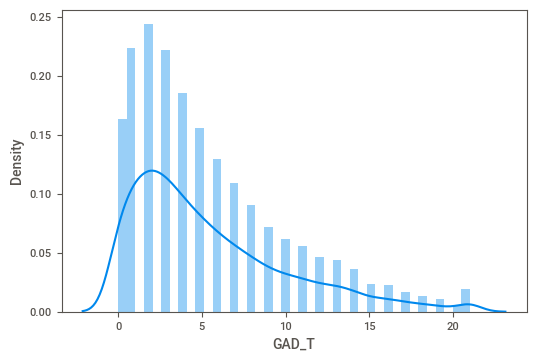

In [86]:
sns.distplot(Gaming_Final['GAD_T'])

C:\Users\Sgallego\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SWL_T', ylabel='Density'>

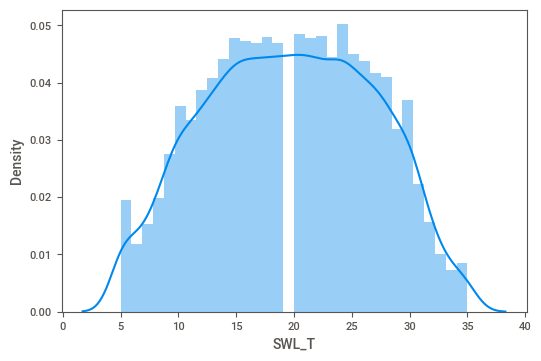

In [87]:
sns.distplot(Gaming_Final['SWL_T'])

C:\Users\Sgallego\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

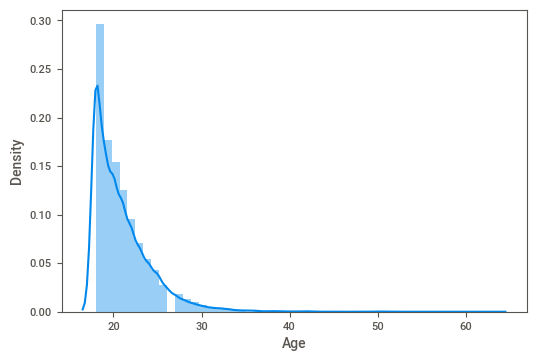

In [88]:
sns.distplot(Gaming_Final['Age'])

C:\Users\Sgallego\AppData\Local\Temp/ipykernel_18824/2812934911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gaming_Final['AgeLOG'] = np.log(Gaming_Final['Age'])
C:\Users\Sgallego\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AgeLOG', ylabel='Density'>

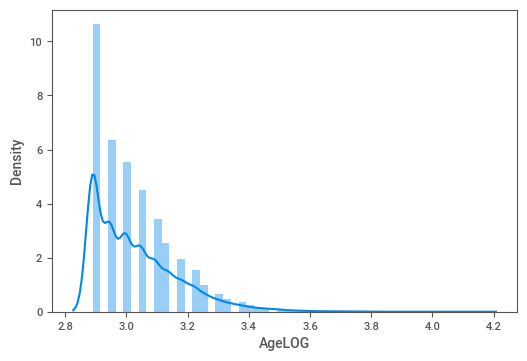

In [89]:
Gaming_Final['AgeLOG'] = np.log(Gaming_Final['Age'])
sns.distplot(Gaming_Final['AgeLOG'])

C:\Users\Sgallego\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

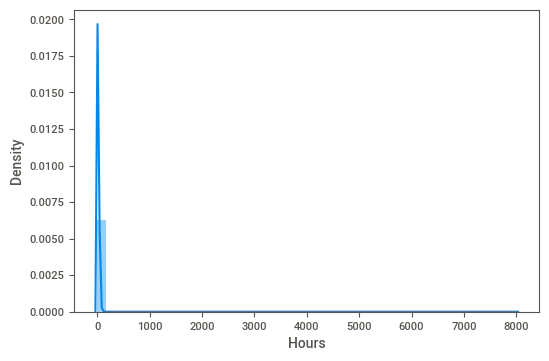

In [90]:
sns.distplot(Gaming_Final['Hours'])

C:\Users\Sgallego\AppData\Local\Temp/ipykernel_18824/3825522872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gaming_Final['HoursSQRT'] = np.sqrt(Gaming_Final['Hours'])
C:\Users\Sgallego\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HoursSQRT', ylabel='Density'>

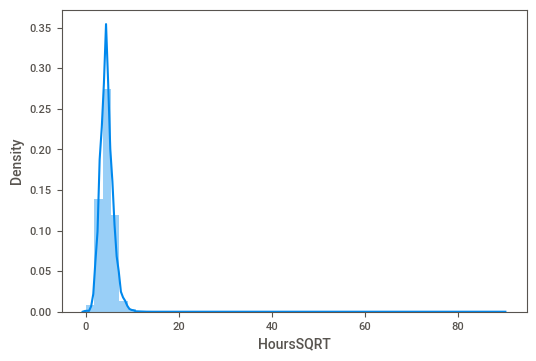

In [91]:
Gaming_Final['HoursSQRT'] = np.sqrt(Gaming_Final['Hours'])
sns.distplot(Gaming_Final['HoursSQRT'])

C:\Users\Sgallego\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='streams', ylabel='Density'>

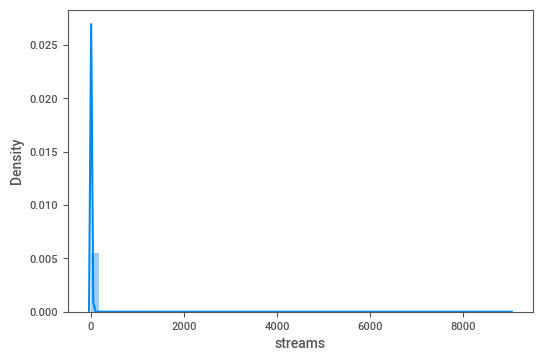

In [92]:
sns.distplot(Gaming_Final['streams'])

C:\Users\Sgallego\AppData\Local\Temp/ipykernel_18824/3321314136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gaming_Final['streamsSQRT'] = np.sqrt(Gaming_Final['streams'])
C:\Users\Sgallego\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='streamsSQRT', ylabel='Density'>

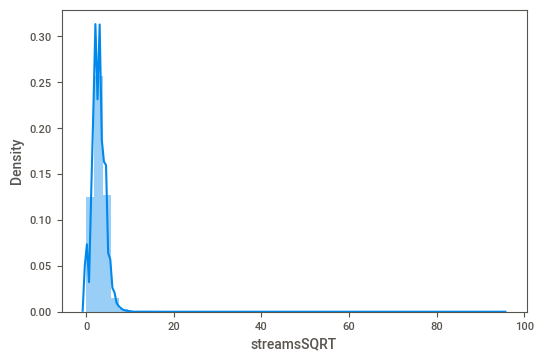

In [93]:
Gaming_Final['streamsSQRT'] = np.sqrt(Gaming_Final['streams'])
sns.distplot(Gaming_Final['streamsSQRT'])

##### Observations
The graphs are positively skewed 

#### Homogeneity of Variance

In [94]:
scp.stats.bartlett(Gaming_Final['GAD_T'], Gaming_Final['GenderR'])

BartlettResult(statistic=55283.91514993345, pvalue=0.0)

In [95]:
scp.stats.fligner(Gaming_Final['GAD_T'], Gaming_Final['GenderR'])

FlignerResult(statistic=13779.453399230366, pvalue=0.0)

In [96]:
stats.ttest_ind(Gaming_Final['GAD_T'], Gaming_Final['GenderR'], equal_var = False)

Ttest_indResult(statistic=128.6655761969909, pvalue=0.0)

In [97]:
stats.ttest_ind(Gaming_Final['GAD_T'], Gaming_Final['WorkR'], equal_var = False)

Ttest_indResult(statistic=77.1258940671517, pvalue=0.0)

In [98]:
stats.ttest_ind(Gaming_Final['GAD_T'], Gaming_Final['DegreeR'], equal_var = False)

Ttest_indResult(statistic=100.91633926135202, pvalue=0.0)

In [99]:
stats.ttest_ind(Gaming_Final['GAD_T'], Gaming_Final['GameR'], equal_var = False)

Ttest_indResult(statistic=19.17211937287276, pvalue=4.668038357951768e-81)

In [100]:
stats.ttest_ind(Gaming_Final['GAD_T'], Gaming_Final['PlatformR'], equal_var = False)

Ttest_indResult(statistic=82.83069958733061, pvalue=0.0)

In [101]:
stats.ttest_ind(Gaming_Final['GAD_T'], Gaming_Final['ReferenceR'], equal_var = False)

Ttest_indResult(statistic=105.83115913882348, pvalue=0.0)

In [102]:
stats.ttest_ind(Gaming_Final['GAD_T'], Gaming_Final['ResidenceR'], equal_var = False)

Ttest_indResult(statistic=-28.777411828359053, pvalue=2.906545257739938e-177)

##### Observation 
There is no homogeneity of variance for GAD_T

In [103]:
stats.ttest_ind(Gaming_Final['SWL_T'], Gaming_Final['GenderR'], equal_var = False)

Ttest_indResult(statistic=303.2196997636517, pvalue=0.0)

In [104]:
stats.ttest_ind(Gaming_Final['SWL_T'], Gaming_Final['ResidenceR'], equal_var = False)

Ttest_indResult(statistic=67.21221410083331, pvalue=0.0)

In [105]:
stats.ttest_ind(Gaming_Final['SWL_T'], Gaming_Final['WorkR'], equal_var = False)

Ttest_indResult(statistic=268.7816858404638, pvalue=0.0)

In [106]:
stats.ttest_ind(Gaming_Final['SWL_T'], Gaming_Final['DegreeR'], equal_var = False)

Ttest_indResult(statistic=284.6675228060791, pvalue=0.0)

In [107]:
stats.ttest_ind(Gaming_Final['SWL_T'], Gaming_Final['GameR'], equal_var = False)

Ttest_indResult(statistic=225.16404431049955, pvalue=0.0)

In [108]:
stats.ttest_ind(Gaming_Final['SWL_T'], Gaming_Final['PlatformR'], equal_var = False)

Ttest_indResult(statistic=273.5400871999942, pvalue=0.0)

In [109]:
stats.ttest_ind(Gaming_Final['SWL_T'], Gaming_Final['ReferenceR'], equal_var = False)

Ttest_indResult(statistic=288.4194986470701, pvalue=0.0)

##### Observation
There is no homogeneity of variance for SWL_T

In [110]:
stats.ttest_ind(Gaming_Final['Hours'], Gaming_Final['GenderR'], equal_var = False)

Ttest_indResult(statistic=34.11953575265446, pvalue=4.939234707378739e-244)

In [111]:
stats.ttest_ind(Gaming_Final['Hours'], Gaming_Final['ResidenceR'], equal_var = False)

Ttest_indResult(statistic=19.164097516155607, pvalue=8.590277970272618e-81)

In [112]:
stats.ttest_ind(Gaming_Final['Hours'], Gaming_Final['WorkR'], equal_var = False)

Ttest_indResult(statistic=30.880606067046482, pvalue=7.515560011364569e-202)

In [113]:
stats.ttest_ind(Gaming_Final['Hours'], Gaming_Final['DegreeR'], equal_var = False)

Ttest_indResult(statistic=32.39831960719156, pvalue=3.553355426217755e-221)

In [114]:
stats.ttest_ind(Gaming_Final['Hours'], Gaming_Final['GameR'], equal_var = False)

Ttest_indResult(statistic=27.171336002950333, pvalue=5.2102040752077875e-158)

In [115]:
stats.ttest_ind(Gaming_Final['Hours'], Gaming_Final['PlatformR'], equal_var = False)

Ttest_indResult(statistic=31.166708418638255, pvalue=1.973616378654024e-205)

In [116]:
stats.ttest_ind(Gaming_Final['Hours'], Gaming_Final['ReferenceR'], equal_var = False)

Ttest_indResult(statistic=32.64887845396266, pvalue=1.9331177676030334e-224)

##### Observation
There is no homogeneity of variance for Hours.

In [117]:
stats.ttest_ind(Gaming_Final['streams'], Gaming_Final['GenderR'], equal_var = False)

Ttest_indResult(statistic=15.482175354590327, pvalue=1.4383565869048702e-53)

In [118]:
stats.ttest_ind(Gaming_Final['streams'], Gaming_Final['ResidenceR'], equal_var = False)

Ttest_indResult(statistic=2.403749414361522, pvalue=0.016241428188806643)

In [119]:
stats.ttest_ind(Gaming_Final['streams'], Gaming_Final['WorkR'], equal_var = False)

Ttest_indResult(statistic=12.580093352387108, pvalue=4.4944599422725514e-36)

In [120]:
stats.ttest_ind(Gaming_Final['streams'], Gaming_Final['DegreeR'], equal_var = False)

Ttest_indResult(statistic=13.940096038593868, pvalue=7.695674454919678e-44)

In [121]:
stats.ttest_ind(Gaming_Final['streams'], Gaming_Final['GameR'], equal_var = False)

Ttest_indResult(statistic=9.260167136031606, pvalue=2.370832699902881e-20)

In [122]:
stats.ttest_ind(Gaming_Final['streams'], Gaming_Final['PlatformR'], equal_var = False)

Ttest_indResult(statistic=12.83532465985397, pvalue=1.793110912196134e-37)

In [123]:
stats.ttest_ind(Gaming_Final['streams'], Gaming_Final['ReferenceR'], equal_var = False)

Ttest_indResult(statistic=14.163922597102111, pvalue=3.426577847309829e-45)

##### Observation
There is no homogeneity of variance for Streams

In [124]:
stats.ttest_ind(Gaming_Final['Age'], Gaming_Final['GenderR'], equal_var = False)

Ttest_indResult(statistic=710.9017530496695, pvalue=0.0)

In [125]:
stats.ttest_ind(Gaming_Final['Age'], Gaming_Final['ResidenceR'], equal_var = False)

Ttest_indResult(statistic=82.019097532536, pvalue=0.0)

In [126]:
stats.ttest_ind(Gaming_Final['Age'], Gaming_Final['WorkR'], equal_var = False)

Ttest_indResult(statistic=619.5489318495038, pvalue=0.0)

In [127]:
stats.ttest_ind(Gaming_Final['Age'], Gaming_Final['DegreeR'], equal_var = False)

Ttest_indResult(statistic=659.4383026044683, pvalue=0.0)

In [128]:
stats.ttest_ind(Gaming_Final['Age'], Gaming_Final['GameR'], equal_var = False)

Ttest_indResult(statistic=479.0467822495235, pvalue=0.0)

In [129]:
stats.ttest_ind(Gaming_Final['Age'], Gaming_Final['PlatformR'], equal_var = False)

Ttest_indResult(statistic=646.7604269217952, pvalue=0.0)

In [130]:
stats.ttest_ind(Gaming_Final['Age'], Gaming_Final['ReferenceR'], equal_var = False)

Ttest_indResult(statistic=678.742483723033, pvalue=0.0)

##### Observation
There is no homogeneity of variance for Age

### Sample Size

##### Final data has 12,491 rows. Sample size passes the test.

### Independence

#### Running Analysis

#### ANOVAS and Means

In [131]:
Gaming_Final.groupby('Gender').mean()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,...,GenderR,ReferenceR,WorkR,DegreeR,ResidenceR,GameR,PlatformR,AgeLOG,HoursSQRT,streamsSQRT
Gender,,,,,,,,,,,,,,,,,,,,,
Female,1.307692,1.177515,1.420118,1.109467,0.646450,1.183432,0.912722,3.477811,4.322485,4.034024,...,1.0,1.066568,2.140533,1.325444,7.852071,4.738166,1.964497,3.058676,4.152612,2.530973
Male,0.874734,0.673409,0.985553,0.734257,0.501572,0.934818,0.596499,3.703748,4.590465,4.321577,...,0.0,1.015042,2.170647,1.172601,9.629982,4.568199,1.986063,3.027987,4.453913,2.903310
Other,1.708333,1.333333,1.562500,1.500000,0.895833,1.375000,1.104167,2.958333,3.937500,3.125000,...,2.0,1.479167,2.395833,1.437500,9.687500,5.395833,2.000000,3.076243,7.179911,5.385910


In [132]:
stats.f_oneway(Gaming_Final['GAD_T'][Gaming_Final['Gender']=="Male"],
               Gaming_Final['GAD_T'][Gaming_Final['Gender']=="Female"],
               Gaming_Final['GAD_T'][Gaming_Final['Gender']=="Other"])

F_onewayResult(statistic=108.05642322093057, pvalue=2.972549457930039e-47)

In [133]:
postHoc = MultiComparison(Gaming_Final['GAD_T'], Gaming_Final['Gender'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Female   Male  -2.4566  0.001 -2.8861 -2.027   True
Female  Other   1.7218 0.0344  0.0994 3.3442   True
  Male  Other   4.1783  0.001  2.6074 5.7492   True
---------------------------------------------------


In [134]:
stats.f_oneway(Gaming_Final['GAD_T'][Gaming_Final['Platform']=="Console (PS, Xbox, ...)"],
               Gaming_Final['GAD_T'][Gaming_Final['Platform']=="PC"],
               Gaming_Final['GAD_T'][Gaming_Final['Platform']=="Smartphone / Tablet"])

F_onewayResult(statistic=3.497305763061792, pvalue=0.030308511552946765)

In [135]:
postHoc = MultiComparison(Gaming_Final['GAD_T'], Gaming_Final['Platform'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
         group1                group2       meandiff p-adj  lower  upper  reject
--------------------------------------------------------------------------------
Console (PS, Xbox, ...)                  PC  -0.1429 0.8922 -0.905 0.6193  False
Console (PS, Xbox, ...) Smartphone / Tablet   2.4597 0.0493 0.0056 4.9139   True
                     PC Smartphone / Tablet   2.6026 0.0246 0.2656 4.9396   True
--------------------------------------------------------------------------------


In [136]:
stats.f_oneway(Gaming_Final['GAD_T'][Gaming_Final['Game']=="Skyrim"],
               Gaming_Final['GAD_T'][Gaming_Final['Game']=="World of Warcraft"],
               Gaming_Final['GAD_T'][Gaming_Final['Game']=="Starcraft 2"],
               Gaming_Final['GAD_T'][Gaming_Final['Game']=="League of Legends"],
               Gaming_Final['GAD_T'][Gaming_Final['Game']=="World of Warcraft"],
               Gaming_Final['GAD_T'][Gaming_Final['Game']=="Counter Strike"],
               Gaming_Final['GAD_T'][Gaming_Final['Game']=="Destiny"],
               Gaming_Final['GAD_T'][Gaming_Final['Game']=="Diablo 3"],
               Gaming_Final['GAD_T'][Gaming_Final['Game']=="Heroes of the Storm"],
               Gaming_Final['GAD_T'][Gaming_Final['Game']=="Hearthstone"],
               Gaming_Final['GAD_T'][Gaming_Final['Game']=="Guild Wars 2"],
               Gaming_Final['GAD_T'][Gaming_Final['Game']=="Other"])

F_onewayResult(statistic=1.3201406707206966, pvalue=0.205624312664129)

In [137]:
 postHoc = MultiComparison(Gaming_Final['GAD_T'], Gaming_Final['Game'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
     Counter Strike             Destiny  -1.9668 0.7936 -5.6177 1.6841  False
     Counter Strike            Diablo 3   0.5014    0.9 -1.3567 2.3596  False
     Counter Strike        Guild Wars 2  -0.7086    0.9 -3.4315 2.0142  False
     Counter Strike         Hearthstone   0.7791    0.9 -1.0379 2.5961  False
     Counter Strike Heroes of the Storm   0.5362    0.9 -2.0857 3.1581  False
     Counter Strike   League of Legends   0.0828    0.9 -0.8008 0.9664  False
     Counter Strike               Other   0.3729    0.9 -0.6276 1.3734  False
     Counter Strike              Skyrim    -0.57    0.9 -3.5432 2.4032  False
     Counter Strike         Starcraft 2   -0.362    0.9 -1.5738 0.8499  False
     Counter Strike   World of Warcraft   0.1157    0.9 -1.4255 

In [138]:
stats.f_oneway(Gaming_Final['GAD_T'][Gaming_Final['Reference']=="Reddit"],
               Gaming_Final['GAD_T'][Gaming_Final['Reference']=="TeamLiquid.net"],
               Gaming_Final['GAD_T'][Gaming_Final['Reference']=="CrowdFlower"],
               Gaming_Final['GAD_T'][Gaming_Final['Reference']=="Other"])

F_onewayResult(statistic=2.3619182925818287, pvalue=0.06926717032095629)

In [139]:
 postHoc = MultiComparison(Gaming_Final['GAD_T'], Gaming_Final['Reference'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2     meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------
CrowdFlower          Other   1.3333    0.9  -5.761  8.4277  False
CrowdFlower         Reddit  -0.2256    0.9 -7.1577  6.7064  False
CrowdFlower TeamLiquid.net  -0.0067    0.9 -7.1428  7.1295  False
      Other         Reddit  -1.5589 0.0412 -3.0753 -0.0426   True
      Other TeamLiquid.net    -1.34 0.4304 -3.6138  0.9338  False
     Reddit TeamLiquid.net   0.2189    0.9 -1.4823  1.9202  False
-----------------------------------------------------------------


In [140]:
 postHoc = MultiComparison(Gaming_Final['GAD_T'], Gaming_Final['Age'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    18     19   -0.296    0.9  -0.7897  0.1977  False
    18     20  -0.1002    0.9  -0.6167  0.4162  False
    18     21  -0.0246    0.9  -0.5785  0.5294  False
    18     22  -0.0605    0.9  -0.6719  0.5509  False
    18     23  -0.2126    0.9  -0.8989  0.4737  False
    18     24  -0.5391  0.648  -1.3084  0.2301  False
    18     25  -0.5786  0.693  -1.4257  0.2685  False
    18     26  -0.5318    0.9  -1.5729  0.5094  False
    18     27  -0.9697 0.4385  -2.2098  0.2705  False
    18     28  -0.2242    0.9  -1.6884    1.24  False
    18     29   -0.516    0.9  -2.2201  1.1882  False
    18     30  -0.7284    0.9  -2.7505  1.2936  False
    18     31  -1.3094    0.9  -3.7453  1.1265  False
    18     32   0.5637    0.9  -2.0521  3.1795  False
    18     33  -1.9893 0.7458  -4.9937  1.0151  False
    18     34  -2.3586    0.

In [141]:
 postHoc = MultiComparison(Gaming_Final['GAD_T'], Gaming_Final['Hours'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.0    1.0   3.9048    0.9  -3.1897 10.9993  False
   0.0    2.0   0.5938    0.9  -5.5735   6.761  False
   0.0    3.0   0.4141    0.9  -5.5785  6.4068  False
   0.0    4.0   0.5224    0.9   -5.385  6.4298  False
   0.0    5.0  -0.0739    0.9   -5.829  5.6813  False
   0.0    6.0  -0.2381    0.9  -6.0745  5.5983  False
   0.0    7.0   0.0326    0.9  -5.7827  5.8478  False
   0.0    8.0    0.011    0.9   -5.741   5.763  False
   0.0    9.0  -0.0385    0.9  -6.1177  6.0408  False
   0.0   10.0   0.1553    0.9  -5.5306  5.8413  False
   0.0   11.0  -0.0294    0.9  -6.6123  6.5534  False
   0.0   12.0    0.137    0.9  -5.5958  5.8698  False
   0.0   13.0    0.859    0.9  -5.2203  6.9382  False
   0.0   14.0   0.2515    0.9  -5.4743  5.9773  False
   0.0   15.0   0.0632    0.9  -5.6292  5.7555  False
   0.0   16.0  -0.0109    0.

In [142]:
 postHoc = MultiComparison(Gaming_Final['GAD_T'], Gaming_Final['streams'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.0    1.0  -0.4419    0.9  -1.5511  0.6674  False
   0.0    2.0  -0.2671    0.9  -1.1983  0.6642  False
   0.0    3.0  -0.3554    0.9   -1.325  0.6141  False
   0.0    4.0  -0.4454    0.9  -1.4555  0.5647  False
   0.0    5.0  -0.1967    0.9  -1.0368  0.6434  False
   0.0    6.0  -0.6113    0.9  -1.7392  0.5165  False
   0.0    7.0  -0.0677    0.9   -1.352  1.2165  False
   0.0    8.0  -0.3906    0.9  -1.4647  0.6836  False
   0.0    9.0  -0.3154    0.9  -3.2457  2.6148  False
   0.0   10.0  -0.0543    0.9  -0.8617  0.7531  False
   0.0   11.0  -0.7376    0.9  -5.7193   4.244  False
   0.0   12.0   0.0607    0.9  -1.2648  1.3863  False
   0.0   13.0    0.608    0.9  -2.5671  3.7831  False
   0.0   14.0  -0.1035    0.9  -1.7378  1.5309  False
   0.0   15.0   0.0517    0.9   -0.884  0.9875  False
   0.0   16.0   0.0846    0.

#### Observation
P values are statistically significant when GAD_T is paired with Gender, Work, Degree, and Platform. Hours playing per week, hours live streaming, the game played, or the reference do not affect GAD_T as strongly. 

In [143]:
stats.f_oneway(Gaming_Final['SWL_T'][Gaming_Final['Gender']=="Male"],
               Gaming_Final['SWL_T'][Gaming_Final['Gender']=="Female"],
               Gaming_Final['SWL_T'][Gaming_Final['Gender']=="Other"])

F_onewayResult(statistic=10.340036289095837, pvalue=3.259067993022161e-05)

In [144]:
postHoc = MultiComparison(Gaming_Final['SWL_T'], Gaming_Final['Gender'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Female   Male   0.7542 0.0221  0.0865  1.4218   True
Female  Other  -3.1373 0.0099 -5.6589 -0.6158   True
  Male  Other  -3.8915  0.001  -6.333   -1.45   True
----------------------------------------------------


In [145]:
postHoc = MultiComparison(Gaming_Final['SWL_T'], Gaming_Final['Work'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                          
             group1                          group2             meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------
                       Employed Student at college / university  -0.3344 0.1724 -0.7548  0.0861  False
                       Employed               Student at school  -0.6154 0.0158 -1.1478 -0.0831   True
                       Employed       Unemployed / between jobs  -5.9707  0.001 -6.5862 -5.3551   True
Student at college / university               Student at school  -0.2811 0.3816 -0.7334  0.1713  False
Student at college / university       Unemployed / between jobs  -5.6363  0.001 -6.1841 -5.0885   True
              Student at school       Unemployed / between jobs  -5.3552  0.001  -5.993 -4.7175   True
-------------------------------------------------------------------------

In [146]:
postHoc = MultiComparison(Gaming_Final['SWL_T'], Gaming_Final['Degree'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

                             Multiple Comparison of Means - Tukey HSD, FWER=0.05                              
               group1                              group2               meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------------
           Bachelor (or equivalent) High school diploma (or equivalent)  -1.4554  0.001 -1.9038  -1.007   True
           Bachelor (or equivalent)              Master (or equivalent)   1.3443 0.0014   0.378  2.3107   True
           Bachelor (or equivalent)                                None  -1.2127  0.001 -1.8566 -0.5688   True
           Bachelor (or equivalent)  Ph.D., Psy. D., MD (or equivalent)   3.0552  0.001  0.9242  5.1862   True
High school diploma (or equivalent)              Master (or equivalent)   2.7997  0.001  1.8894    3.71   True
High school diploma (or equivalent)                                None   0.2427 0.7297 -0.3135   0.799  False
H

In [147]:
postHoc = MultiComparison(Gaming_Final['SWL_T'], Gaming_Final['Platform'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
         group1                group2       meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------
Console (PS, Xbox, ...)                  PC   -1.168 0.0519 -2.3435 0.0075  False
Console (PS, Xbox, ...) Smartphone / Tablet  -1.4126 0.6431 -5.1977 2.3726  False
                     PC Smartphone / Tablet  -0.2446    0.9  -3.849 3.3598  False
---------------------------------------------------------------------------------


In [148]:
postHoc = MultiComparison(Gaming_Final['SWL_T'], Gaming_Final['Hours'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.0    1.0  -4.6667    0.9 -15.5658  6.2325  False
   0.0    2.0  -0.5312    0.9 -10.0059  8.9434  False
   0.0    3.0  -0.6869    0.9  -9.8933  8.5195  False
   0.0    4.0  -0.6716    0.9  -9.7471  8.4038  False
   0.0    5.0  -0.6619    0.9  -9.5034  8.1795  False
   0.0    6.0   0.1905    0.9  -8.7758  9.1568  False
   0.0    7.0   0.1209    0.9  -8.8129  9.0548  False
   0.0    8.0  -1.0055    0.9  -9.8422  7.8312  False
   0.0    9.0  -0.7821    0.9 -10.1215  8.5574  False
   0.0   10.0  -0.5082    0.9  -9.2433   8.227  False
   0.0   11.0   2.0294    0.9  -8.0837 12.1425  False
   0.0   12.0  -0.7022    0.9  -9.5094   8.105  False
   0.0   13.0   0.5128    0.9  -8.8266  9.8522  False
   0.0   14.0  -1.1395    0.9  -9.9359  7.6569  False
   0.0   15.0  -0.3557    0.9  -9.1008  8.3894  False
   0.0   16.0  -0.5055    0.

In [149]:
postHoc = MultiComparison(Gaming_Final['SWL_T'], Gaming_Final['streams'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.0    1.0   1.4385 0.3559  -0.2728  3.1497  False
   0.0    2.0   1.1665 0.4591  -0.2702  2.6033  False
   0.0    3.0   0.7487    0.9   -0.747  2.2444  False
   0.0    4.0   1.1403  0.697  -0.4181  2.6986  False
   0.0    5.0   0.6478    0.9  -0.6482  1.9439  False
   0.0    6.0   1.2889 0.6705  -0.4511  3.0289  False
   0.0    7.0   0.6677    0.9  -1.3135   2.649  False
   0.0    8.0   0.8513    0.9  -0.8058  2.5084  False
   0.0    9.0   1.8509    0.9  -2.6697  6.3715  False
   0.0   10.0   0.4324    0.9  -0.8132   1.678  False
   0.0   11.0   2.6731    0.9  -5.0123 10.3585  False
   0.0   12.0   -0.021    0.9   -2.066   2.024  False
   0.0   13.0   1.6222    0.9  -3.2761  6.5206  False
   0.0   14.0  -0.1454    0.9  -2.6667   2.376  False
   0.0   15.0   0.0578    0.9  -1.3858  1.5014  False
   0.0   16.0   0.7588    0.

In [150]:
postHoc = MultiComparison(Gaming_Final['SWL_T'], Gaming_Final['Age'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    18     19  -0.4562    0.9  -1.2164   0.304  False
    18     20  -0.9609 0.0023  -1.7561 -0.1656   True
    18     21  -0.8277 0.0727  -1.6806  0.0253  False
    18     22  -0.9855  0.027   -1.927 -0.0441   True
    18     23  -0.8312 0.4247  -1.8879  0.2255  False
    18     24  -0.8549 0.5951  -2.0394  0.3295  False
    18     25  -0.8863 0.7019  -2.1907   0.418  False
    18     26  -1.2543  0.437  -2.8575  0.3488  False
    18     27   0.2934    0.9  -1.6161  2.2029  False
    18     28  -0.5589    0.9  -2.8134  1.6957  False
    18     29   0.5823    0.9  -2.0417  3.2063  False
    18     30   0.5443    0.9  -2.5692  3.6577  False
    18     31   2.3601 0.8288  -1.3906  6.1107  False
    18     32  -1.2511    0.9  -5.2787  2.7766  False
    18     33   2.5954    0.9  -2.0307  7.2214  False
    18     34   3.3045    0.

In [151]:
postHoc = MultiComparison(Gaming_Final['SWL_T'], Gaming_Final['Game'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
     Counter Strike             Destiny    2.975 0.8137 -2.6521 8.6021  False
     Counter Strike            Diablo 3   -0.521    0.9  -3.385  2.343  False
     Counter Strike        Guild Wars 2   0.6253    0.9 -3.5713  4.822  False
     Counter Strike         Hearthstone   1.1498    0.9 -1.6507 3.9503  False
     Counter Strike Heroes of the Storm   0.0411    0.9    -4.0 4.0822  False
     Counter Strike   League of Legends    1.089 0.2624 -0.2729  2.451  False
     Counter Strike               Other   0.6417    0.9 -0.9004 2.1837  False
     Counter Strike              Skyrim   2.7766 0.6591 -1.8059 7.3591  False
     Counter Strike         Starcraft 2   2.3912 0.0019  0.5235  4.259   True
     Counter Strike   World of Warcraft   0.4052    0.9 -1.9703 

In [152]:
postHoc = MultiComparison(Gaming_Final['SWL_T'], Gaming_Final['Reference'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2     meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------
CrowdFlower          Other  -6.2381 0.4603  -17.181 4.7048  False
CrowdFlower         Reddit  -6.0427  0.468 -16.7353 4.6498  False
CrowdFlower TeamLiquid.net  -5.2867 0.5925  -16.294 5.7207  False
      Other         Reddit   0.1953    0.9  -2.1436 2.5343  False
      Other TeamLiquid.net   0.9514 0.8939  -2.5559 4.4587  False
     Reddit TeamLiquid.net   0.7561 0.8696   -1.868 3.3802  False
-----------------------------------------------------------------


#### Observation
P values are statistically significant when GAD_T is paired with Gender, Work, and Degree. 

In [153]:
stats.f_oneway(Gaming_Final['Hours'][Gaming_Final['Gender']=="Male"],
               Gaming_Final['Hours'][Gaming_Final['Gender']=="Female"],
               Gaming_Final['Hours'][Gaming_Final['Gender']=="Other"])

F_onewayResult(statistic=154.1168806738858, pvalue=7.595671828732415e-67)

In [154]:
postHoc = MultiComparison(Gaming_Final['Hours'], Gaming_Final['Gender'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
Female   Male   2.4547 0.6498  -4.2119   9.1212  False
Female  Other 184.6771  0.001 159.4992 209.8551   True
  Male  Other 182.2224  0.001 157.8439  206.601   True
------------------------------------------------------


In [155]:
stats.f_oneway(Gaming_Final['Hours'][Gaming_Final['Work']=="Student at college / university"],
               Gaming_Final['Hours'][Gaming_Final['Work']=="Employed"],
               Gaming_Final['Hours'][Gaming_Final['Work']=="Student at school"],
               Gaming_Final['Hours'][Gaming_Final['Work']=="Unemployed / between jobs"])

F_onewayResult(statistic=12.005131324890773, pvalue=7.617080953009164e-08)

In [156]:
postHoc = MultiComparison(Gaming_Final['Hours'], Gaming_Final['Work'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                          
             group1                          group2             meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------
                       Employed Student at college / university   0.3883    0.9 -3.9798  4.7563  False
                       Employed               Student at school   2.1023 0.7369 -3.4283  7.6329  False
                       Employed       Unemployed / between jobs  13.2575  0.001  6.8624 19.6525   True
Student at college / university               Student at school   1.7141 0.7591  -2.985  6.4131  False
Student at college / university       Unemployed / between jobs  12.8692  0.001  7.1779 18.5604   True
              Student at school       Unemployed / between jobs  11.1551  0.001  4.5296 17.7807   True
-------------------------------------------------------------------------

In [157]:
postHoc = MultiComparison(Gaming_Final['Hours'], Gaming_Final['Work'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                          
             group1                          group2             meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------
                       Employed Student at college / university   0.3883    0.9 -3.9798  4.7563  False
                       Employed               Student at school   2.1023 0.7369 -3.4283  7.6329  False
                       Employed       Unemployed / between jobs  13.2575  0.001  6.8624 19.6525   True
Student at college / university               Student at school   1.7141 0.7591  -2.985  6.4131  False
Student at college / university       Unemployed / between jobs  12.8692  0.001  7.1779 18.5604   True
              Student at school       Unemployed / between jobs  11.1551  0.001  4.5296 17.7807   True
-------------------------------------------------------------------------

In [158]:
stats.f_oneway(Gaming_Final['streams'][Gaming_Final['Gender']=="Male"],
               Gaming_Final['streams'][Gaming_Final['Gender']=="Female"],
               Gaming_Final['streams'][Gaming_Final['Gender']=="Other"])

F_onewayResult(statistic=144.33689433982434, pvalue=1.068614249087169e-62)

In [159]:
postHoc = MultiComparison(Gaming_Final['streams'], Gaming_Final['Gender'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
Female   Male   1.6703 0.8426  -5.7728   9.1134  False
Female  Other 198.7558  0.001 170.6449 226.8667   True
  Male  Other 197.0855  0.001 169.8671 224.3039   True
------------------------------------------------------


#### Observation
P values are statistically significant when Hours is paired to socio-economic factors like Gender and Work.

In [160]:
Gaming_Final.groupby('Age').mean()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,...,GenderR,ReferenceR,WorkR,DegreeR,ResidenceR,GameR,PlatformR,AgeLOG,HoursSQRT,streamsSQRT
Age,,,,,,,,,,,,,,,,,,,,,
18,0.893393,0.708709,1.053754,0.744144,0.528529,1.039940,0.667868,3.853754,4.699099,4.463664,...,0.046246,1.019219,2.553754,0.718919,9.491291,4.424925,1.987988,2.890372,4.572442,2.785918
19,0.867470,0.677711,1.013052,0.710843,0.520582,0.948795,0.601908,3.736446,4.641064,4.300201,...,0.047691,1.021586,2.195783,0.988454,9.518072,4.585341,1.984940,2.944439,4.538541,2.852685
20,0.917966,0.723859,1.039861,0.756210,0.525130,0.939919,0.633160,3.519931,4.553437,4.217215,...,0.064125,1.013865,2.128250,1.093588,9.995956,4.589255,1.986135,2.995732,4.488004,2.905925
21,0.934705,0.738822,1.037615,0.789212,0.526615,0.928318,0.656494,3.613201,4.499645,4.224982,...,0.066714,1.021292,2.126331,1.247693,9.350603,4.651526,1.985096,3.044522,4.458807,3.027843
22,0.954419,0.768372,1.053953,0.806512,0.487442,0.901395,0.603721,3.544186,4.478140,4.167442,...,0.078140,1.020465,2.052093,1.433488,9.850233,4.668837,1.980465,3.091042,4.368914,2.982867
23,0.922500,0.710000,0.996250,0.808750,0.525000,0.898750,0.562500,3.621250,4.427500,4.178750,...,0.070000,1.007500,1.947500,1.570000,9.737500,4.623750,1.985000,3.135494,4.303198,3.021865
24,0.881384,0.678748,0.922570,0.751236,0.476112,0.850082,0.537068,3.581549,4.509061,4.248764,...,0.075783,1.023064,1.887974,1.657331,10.604613,4.609555,1.970346,3.178054,4.354137,2.976515
25,0.865979,0.618557,0.917526,0.752577,0.447423,0.892784,0.562887,3.579381,4.418557,4.173196,...,0.084536,1.020619,1.785567,1.810309,8.977320,4.674227,1.983505,3.218876,4.189890,2.882211
26,0.928105,0.650327,0.869281,0.754902,0.464052,0.905229,0.532680,3.539216,4.346405,4.111111,...,0.101307,1.032680,1.794118,1.862745,8.339869,4.568627,1.973856,3.258097,4.166459,2.949674


In [161]:
Gaming_Final.groupby('Residence').mean()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,...,GenderR,ReferenceR,WorkR,DegreeR,ResidenceR,GameR,PlatformR,AgeLOG,HoursSQRT,streamsSQRT
Residence,,,,,,,,,,,,,,,,,,,,,
Albania,1.000000,0.500000,1.166667,1.000000,0.000000,1.000000,0.500000,3.166667,3.500000,3.166667,...,0.000000,1.000000,2.500000,1.333333,79.0,5.166667,2.000000,3.016138,4.527725,1.907557
Algeria,0.000000,0.500000,0.500000,1.000000,1.000000,1.000000,0.000000,5.500000,6.500000,6.000000,...,0.000000,1.000000,2.000000,1.500000,60.0,4.000000,2.000000,2.970086,6.073579,2.280239
Argentina,0.882353,0.627451,0.892157,0.647059,0.352941,0.931373,0.421569,3.549020,4.333333,4.500000,...,0.029412,1.000000,2.088235,1.264706,30.0,4.186275,2.000000,3.029395,4.685331,3.045246
Australia,0.995413,0.766055,0.995413,0.683486,0.605505,0.990826,0.711009,3.619266,4.610092,4.055046,...,0.059633,1.004587,2.243119,1.188073,10.0,4.522936,1.990826,3.010997,4.786848,2.665333
Austria,0.602837,0.617021,0.992908,0.489362,0.248227,0.787234,0.517730,3.950355,4.957447,4.737589,...,0.007092,1.021277,2.198582,1.007092,25.0,4.687943,1.985816,3.031808,4.592788,3.056502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,0.444444,0.333333,0.777778,0.555556,0.555556,0.666667,0.444444,4.333333,4.444444,4.444444,...,0.111111,1.000000,1.666667,1.555556,50.0,4.000000,2.000000,3.077215,3.970779,2.646167
Unknown,0.907216,0.773196,1.072165,0.721649,0.597938,1.061856,0.721649,3.505155,4.092784,4.123711,...,0.175258,1.278351,2.484536,1.216495,37.0,5.226804,1.989691,3.042776,6.095220,3.903858
Uruguay,1.666667,1.166667,1.500000,1.416667,0.416667,1.166667,1.166667,3.166667,4.333333,3.500000,...,0.083333,1.000000,2.166667,1.166667,68.0,4.000000,2.000000,3.006032,4.595491,3.358439


In [162]:
Gaming_Final.groupby('Work').mean()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,...,GenderR,ReferenceR,WorkR,DegreeR,ResidenceR,GameR,PlatformR,AgeLOG,HoursSQRT,streamsSQRT
Work,,,,,,,,,,,,,,,,,,,,,
Employed,0.792803,0.573745,0.854488,0.702254,0.474891,0.903124,0.502966,3.860024,4.677343,4.493476,...,0.066825,1.026493,1.0,1.612890,7.427046,4.669830,1.982997,3.160383,4.302801,2.844971
Student at college / university,0.913307,0.708548,1.019551,0.754168,0.504698,0.899515,0.609730,3.806911,4.744468,4.421491,...,0.060928,1.017884,2.0,1.202182,9.929069,4.562898,1.986360,3.007686,4.358211,2.896436
Student at school,0.881560,0.709196,1.047665,0.722195,0.524314,1.064998,0.658642,3.784304,4.597978,4.408281,...,0.048146,1.013000,3.0,0.535869,10.320655,4.463168,1.987000,2.909177,4.537180,2.706995
Unemployed / between jobs,1.085470,0.920746,1.218337,0.940171,0.592075,1.114996,0.797203,2.591298,3.452991,3.135975,...,0.078477,1.025641,4.0,1.273504,10.379176,4.685315,1.978244,3.081564,5.050516,3.267026


In [163]:
Gaming_Final.groupby('Degree').mean()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,...,GenderR,ReferenceR,WorkR,DegreeR,ResidenceR,GameR,PlatformR,AgeLOG,HoursSQRT,streamsSQRT
Degree,,,,,,,,,,,,,,,,,,,,,
Bachelor (or equivalent),0.867228,0.643402,0.927798,0.760529,0.466506,0.862415,0.524669,3.892499,4.713197,4.472924,...,0.079422,1.025271,1.839952,2.0,9.327316,4.659848,1.983955,3.140535,4.213066,2.869157
High school diploma (or equivalent),0.914846,0.725069,1.036549,0.762371,0.526626,0.964959,0.648330,3.583899,4.516830,4.217408,...,0.058026,1.016076,2.182994,1.0,9.252449,4.575735,1.985933,2.999917,4.504498,2.929851
Master (or equivalent),0.865031,0.615542,0.860941,0.672802,0.427403,0.805726,0.449898,4.188139,4.889571,4.627812,...,0.073620,1.022495,1.801636,3.0,10.531697,4.631902,1.971370,3.224335,4.055957,2.788073
None,0.900685,0.720548,1.071918,0.758904,0.537671,1.067808,0.654795,3.695890,4.508219,4.312329,...,0.040411,1.019178,2.804795,0.0,10.981507,4.442466,1.984932,2.926753,4.617928,2.708114
"Ph.D., Psy. D., MD (or equivalent)",0.862069,0.620690,0.919540,0.678161,0.367816,0.919540,0.494253,4.505747,5.068966,5.057471,...,0.195402,1.172414,1.839080,4.0,11.321839,4.781609,2.000000,3.232219,5.373257,3.853075


In [164]:
Gaming_Final.groupby('Platform').mean()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,...,GenderR,ReferenceR,WorkR,DegreeR,ResidenceR,GameR,PlatformR,AgeLOG,HoursSQRT,streamsSQRT
Platform,,,,,,,,,,,,,,,,,,,,,
"Console (PS, Xbox, ...)",0.933333,0.719048,0.985714,0.885714,0.566667,0.880952,0.614286,3.866667,4.747619,4.461905,...,0.147619,1.042857,2.185714,1.271429,9.180952,8.680952,1.0,3.052747,4.128290,2.246895
PC,0.900073,0.702178,1.010931,0.754792,0.508606,0.951220,0.615058,3.685619,4.571091,4.299046,...,0.059874,1.018435,2.169998,1.179786,9.531283,4.502325,2.0,3.029177,4.453047,2.902767
Smartphone / Tablet,1.318182,1.136364,1.454545,1.045455,1.272727,0.909091,0.909091,3.681818,4.227273,4.090909,...,0.318182,1.454545,1.954545,1.500000,14.409091,9.045455,3.0,3.177246,4.733880,3.447474


In [165]:
Gaming_Final.groupby('Game').mean()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,...,GenderR,ReferenceR,WorkR,DegreeR,ResidenceR,GameR,PlatformR,AgeLOG,HoursSQRT,streamsSQRT
Game,,,,,,,,,,,,,,,,,,,,,
Counter Strike,0.852349,0.674497,0.966443,0.771812,0.479866,1.050336,0.560403,3.533557,4.436242,4.036913,...,0.016779,1.020134,2.338926,0.996644,9.087248,5.0,1.993289,2.984725,4.866443,2.968347
Destiny,0.666667,0.388889,0.666667,0.333333,0.277778,0.722222,0.333333,3.722222,4.666667,4.500000,...,0.055556,1.000000,2.000000,1.722222,3.222222,6.0,1.222222,3.159012,4.290710,2.234542
Diablo 3,0.928571,0.821429,1.107143,0.845238,0.523810,0.952381,0.678571,3.345238,4.107143,4.107143,...,0.071429,1.000000,2.440476,1.107143,8.154762,7.0,2.000000,3.064573,5.147345,2.826007
Guild Wars 2,0.911765,0.647059,0.676471,0.588235,0.529412,0.794118,0.500000,3.382353,4.735294,4.176471,...,0.147059,1.000000,2.382353,1.294118,12.117647,10.0,2.000000,3.057190,4.812156,2.614708
Hearthstone,1.011236,0.853933,1.101124,0.876404,0.797753,0.932584,0.561798,3.764045,4.752809,4.370787,...,0.056180,1.146067,2.134831,1.325843,12.224719,9.0,2.033708,3.065828,4.026469,3.492602
Heroes of the Storm,1.162162,0.945946,1.324324,0.864865,0.189189,0.783784,0.621622,3.432432,4.540541,4.135135,...,0.108108,1.000000,2.027027,1.486486,12.297297,8.0,2.000000,3.124748,4.416100,2.972688
League of Legends,0.897697,0.697278,1.015226,0.748287,0.509231,0.956700,0.614104,3.698420,4.582318,4.314427,...,0.060716,1.013799,2.170156,1.166635,9.581938,4.0,1.995622,3.024644,4.442783,2.908900
Other,0.942308,0.748932,1.021368,0.845085,0.549145,0.930556,0.691239,3.581197,4.510684,4.194444,...,0.089744,1.053419,2.117521,1.267094,9.325855,11.0,1.867521,3.057280,4.470905,2.557526
Skyrim,0.821429,0.500000,0.714286,0.857143,0.428571,0.928571,0.535714,3.892857,4.500000,4.642857,...,0.214286,1.035714,2.000000,1.500000,7.964286,1.0,1.892857,3.094724,4.486196,2.372610


In [166]:
Gaming_Final.groupby('Reference').mean()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,...,GenderR,ReferenceR,WorkR,DegreeR,ResidenceR,GameR,PlatformR,AgeLOG,HoursSQRT,streamsSQRT
Reference,,,,,,,,,,,,,,,,,,,,,
CrowdFlower,0.333333,1.000000,1.666667,0.333333,0.333333,0.333333,1.666667,5.333333,6.000000,6.000000,...,0.666667,3.0,2.666667,2.000000,25.333333,4.000000,2.000000,3.127537,6.314757,0.816497
Other,1.126984,0.825397,1.269841,0.936508,0.825397,1.126984,0.888889,3.730159,4.301587,4.158730,...,0.444444,4.0,2.126984,1.428571,13.730159,6.015873,2.000000,3.049768,5.257674,2.871215
Reddit,0.900121,0.702061,1.009859,0.756606,0.509576,0.949172,0.613657,3.688162,4.573010,4.302061,...,0.059717,1.0,2.170828,1.179960,9.507798,4.575677,1.984727,3.029670,4.443317,2.891563
TeamLiquid.net,0.960000,0.820000,1.000000,0.780000,0.460000,0.960000,0.680000,3.660000,4.940000,4.220000,...,0.060000,2.0,1.960000,1.300000,9.780000,4.020000,2.020000,3.039447,4.495420,3.325670


#### MANOVAS

In [167]:
maov = MANOVA.from_formula('Game+Platform+Reference~GAD_T',data=Gaming_Final)

In [168]:
print(maov.mv_test())

                                   Multivariate linear model
                                                                                                
------------------------------------------------------------------------------------------------
       Intercept                Value          Num DF   Den DF           F Value          Pr > F
------------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 16.0000 12474.0000 -100317681699678576.0000 1.0000
         Pillai's trace                1.0000 16.0000 12474.0000 -100317681699678576.0000 1.0000
 Hotelling-Lawley trace -128674275067729.4531 16.0000 12474.0000 -100317681699678576.0000 1.0000
    Roy's greatest root -128674275067729.4531 16.0000 12474.0000 -100317681699678576.0000 1.0000
------------------------------------------------------------------------------------------------
                                                                  

In [169]:
maov2 = MANOVA.from_formula('Game+Platform+Reference~SWL_T',data=Gaming_Final)
print(maov2.mv_test())

                                  Multivariate linear model
                                                                                              
----------------------------------------------------------------------------------------------
       Intercept               Value          Num DF   Den DF           F Value         Pr > F
----------------------------------------------------------------------------------------------
          Wilks' lambda              -0.0000 16.0000 12474.0000 -71655486928342056.0000 1.0000
         Pillai's trace               1.0000 16.0000 12474.0000 -71655486928342072.0000 1.0000
 Hotelling-Lawley trace -91910196476949.8906 16.0000 12474.0000 -71655486928342048.0000 1.0000
    Roy's greatest root -91910196476949.8906 16.0000 12474.0000 -71655486928342056.0000 1.0000
----------------------------------------------------------------------------------------------
                                                                                     

In [170]:
maov3 = MANOVA.from_formula('Game+Platform+Reference~Hours',data=Gaming_Final)
print(maov3.mv_test())

                                    Multivariate linear model
                                                                                                  
--------------------------------------------------------------------------------------------------
       Intercept                Value           Num DF   Den DF            F Value          Pr > F
--------------------------------------------------------------------------------------------------
          Wilks' lambda                -0.0000 16.0000 12474.0000 -1170372953162908416.0000 1.0000
         Pillai's trace                 1.0000 16.0000 12474.0000 -1170372953162908416.0000 1.0000
 Hotelling-Lawley trace -1501199875790166.2500 16.0000 12474.0000 -1170372953162908416.0000 1.0000
    Roy's greatest root -1501199875790166.2500 16.0000 12474.0000 -1170372953162908416.0000 1.0000
--------------------------------------------------------------------------------------------------
                                               

In [171]:
maov4 = MANOVA.from_formula('Game+Platform+Reference~streams',data=Gaming_Final)
print(maov4.mv_test())

                                   Multivariate linear model
                                                                                                
------------------------------------------------------------------------------------------------
       Intercept                Value          Num DF   Den DF           F Value          Pr > F
------------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 16.0000 12474.0000 -292593238290727680.0000 1.0000
         Pillai's trace                1.0000 16.0000 12474.0000 -292593238290727680.0000 1.0000
 Hotelling-Lawley trace -375299968947542.3125 16.0000 12474.0000 -292593238290727680.0000 1.0000
    Roy's greatest root -375299968947542.3125 16.0000 12474.0000 -292593238290727680.0000 1.0000
------------------------------------------------------------------------------------------------
                                                                  

In [172]:
maov4 = MANOVA.from_formula('Game+Platform+Reference~Age',data=Gaming_Final)
print(maov4.mv_test())

                                  Multivariate linear model
                                                                                              
----------------------------------------------------------------------------------------------
       Intercept               Value          Num DF   Den DF           F Value         Pr > F
----------------------------------------------------------------------------------------------
          Wilks' lambda              -0.0000 16.0000 12474.0000 -43888985743609816.0000 1.0000
         Pillai's trace               1.0000 16.0000 12474.0000 -43888985743609816.0000 1.0000
 Hotelling-Lawley trace -56294995342132.2031 16.0000 12474.0000 -43888985743609816.0000 1.0000
    Roy's greatest root -56294995342132.2031 16.0000 12474.0000 -43888985743609816.0000 1.0000
----------------------------------------------------------------------------------------------
                                                                                     

In [173]:
maov5 = MANOVA.from_formula('Work+Degree~GAD_T',data=Gaming_Final)
print(maov5.mv_test())

                                   Multivariate linear model
                                                                                                
------------------------------------------------------------------------------------------------
       Intercept                Value         Num DF   Den DF            F Value          Pr > F
------------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 8.0000 12482.0000 -1003820188372118144.0000 1.0000
         Pillai's trace                1.0000 8.0000 12482.0000 -1003820188372118272.0000 1.0000
 Hotelling-Lawley trace -643371375338643.2500 8.0000 12482.0000 -1003820188372118144.0000 1.0000
    Roy's greatest root -643371375338643.2500 8.0000 12482.0000 -1003820188372118144.0000 1.0000
------------------------------------------------------------------------------------------------
                                                                  

In [174]:
maov6 = MANOVA.from_formula('Work+Degree~SWL_T',data=Gaming_Final)
print(maov6.mv_test())

                                  Multivariate linear model
                                                                                              
----------------------------------------------------------------------------------------------
       Intercept               Value         Num DF   Den DF           F Value          Pr > F
----------------------------------------------------------------------------------------------
          Wilks' lambda              -0.0000 8.0000 12482.0000 -115192480632867408.0000 1.0000
         Pillai's trace               1.0000 8.0000 12482.0000 -115192480632867408.0000 1.0000
 Hotelling-Lawley trace -73829502088041.9219 8.0000 12482.0000 -115192480632867408.0000 1.0000
    Roy's greatest root -73829502088041.9219 8.0000 12482.0000 -115192480632867408.0000 1.0000
----------------------------------------------------------------------------------------------
                                                                                     

In [175]:
maov7 = MANOVA.from_formula('Work+Degree~Hours',data=Gaming_Final)
print(maov7.mv_test())

                                    Multivariate linear model
                                                                                                 
-------------------------------------------------------------------------------------------------
       Intercept                Value          Num DF   Den DF            F Value          Pr > F
-------------------------------------------------------------------------------------------------
          Wilks' lambda                -0.0000 8.0000 12482.0000 -1756685329651205632.0000 1.0000
         Pillai's trace                 1.0000 8.0000 12482.0000 -1756685329651205632.0000 1.0000
 Hotelling-Lawley trace -1125899906842625.0000 8.0000 12482.0000 -1756685329651205632.0000 1.0000
    Roy's greatest root -1125899906842625.0000 8.0000 12482.0000 -1756685329651205632.0000 1.0000
-------------------------------------------------------------------------------------------------
                                                        

In [176]:
maov8 = MANOVA.from_formula('Work+Degree~streams',data=Gaming_Final)
print(maov8.mv_test())

                                    Multivariate linear model
                                                                                                 
-------------------------------------------------------------------------------------------------
       Intercept                Value          Num DF   Den DF            F Value          Pr > F
-------------------------------------------------------------------------------------------------
          Wilks' lambda                -0.0000 8.0000 12482.0000 -1756685329651205632.0000 1.0000
         Pillai's trace                 1.0000 8.0000 12482.0000 -1756685329651205632.0000 1.0000
 Hotelling-Lawley trace -1125899906842625.0000 8.0000 12482.0000 -1756685329651205632.0000 1.0000
    Roy's greatest root -1125899906842625.0000 8.0000 12482.0000 -1756685329651205632.0000 1.0000
-------------------------------------------------------------------------------------------------
                                                        

In [177]:
maov8 = MANOVA.from_formula('Work+Degree~Age',data=Gaming_Final)
print(maov8.mv_test())

                                 Multivariate linear model
                                                                                           
-------------------------------------------------------------------------------------------
       Intercept               Value        Num DF   Den DF          F Value         Pr > F
-------------------------------------------------------------------------------------------
          Wilks' lambda              0.0000 8.0000 12482.0000 24271990737838908.0000 0.0000
         Pillai's trace              1.0000 8.0000 12482.0000 24271990737838912.0000 0.0000
 Hotelling-Lawley trace 15556475396788.2773 8.0000 12482.0000 24271990737838908.0000 0.0000
    Roy's greatest root 15556475396788.2773 8.0000 12482.0000 24271990737838908.0000 0.0000
-------------------------------------------------------------------------------------------
                                                                                           
---------------------

In [178]:
maov10 = MANOVA.from_formula('Gender+Work+Degree~Age',data=Gaming_Final)
print(maov10.mv_test())

                                   Multivariate linear model
                                                                                                
------------------------------------------------------------------------------------------------
       Intercept                Value          Num DF   Den DF           F Value          Pr > F
------------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 10.0000 12480.0000 -562049233495839104.0000 1.0000
         Pillai's trace                1.0000 10.0000 12480.0000 -562049233495839104.0000 1.0000
 Hotelling-Lawley trace -450359962737050.6250 10.0000 12480.0000 -562049233495839168.0000 1.0000
    Roy's greatest root -450359962737050.6250 10.0000 12480.0000 -562049233495839168.0000 1.0000
------------------------------------------------------------------------------------------------
                                                                  

In [179]:
maov11 = MANOVA.from_formula('Game+Platform+Reference~Age',data=Gaming_Final)
print(maov11.mv_test())

                                  Multivariate linear model
                                                                                              
----------------------------------------------------------------------------------------------
       Intercept               Value          Num DF   Den DF           F Value         Pr > F
----------------------------------------------------------------------------------------------
          Wilks' lambda              -0.0000 16.0000 12474.0000 -43888985743609816.0000 1.0000
         Pillai's trace               1.0000 16.0000 12474.0000 -43888985743609816.0000 1.0000
 Hotelling-Lawley trace -56294995342132.2031 16.0000 12474.0000 -43888985743609816.0000 1.0000
    Roy's greatest root -56294995342132.2031 16.0000 12474.0000 -43888985743609816.0000 1.0000
----------------------------------------------------------------------------------------------
                                                                                     

In [180]:
maov33 = MANOVA.from_formula('Hours+streams~GAD_T',data=Gaming_Final)
print(maov33.mv_test())

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF    F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.7993 2.0000 12488.0000 1568.2441 0.0000
         Pillai's trace 0.2007 2.0000 12488.0000 1568.2441 0.0000
 Hotelling-Lawley trace 0.2512 2.0000 12488.0000 1568.2441 0.0000
    Roy's greatest root 0.2512 2.0000 12488.0000 1568.2441 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
           GAD_T          Value  Num DF   Den DF   F Value Pr > F
-----------------------------------------------------------------
            Wilks' lambda 0.9981 2.0000 12488.0000 12.0199 0.0000
           Pillai's trace 0.00

In [181]:
maov44 = MANOVA.from_formula('Work+Degree~GAD_T',data=Gaming_Final)
print(maov44.mv_test())

                                   Multivariate linear model
                                                                                                
------------------------------------------------------------------------------------------------
       Intercept                Value         Num DF   Den DF            F Value          Pr > F
------------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 8.0000 12482.0000 -1003820188372118144.0000 1.0000
         Pillai's trace                1.0000 8.0000 12482.0000 -1003820188372118272.0000 1.0000
 Hotelling-Lawley trace -643371375338643.2500 8.0000 12482.0000 -1003820188372118144.0000 1.0000
    Roy's greatest root -643371375338643.2500 8.0000 12482.0000 -1003820188372118144.0000 1.0000
------------------------------------------------------------------------------------------------
                                                                  

In [182]:
maov55 = MANOVA.from_formula('Gender+Age~GAD_T',data=Gaming_Final)
print(maov55.mv_test())

                                   Multivariate linear model
                                                                                                
------------------------------------------------------------------------------------------------
       Intercept                Value         Num DF   Den DF            F Value          Pr > F
------------------------------------------------------------------------------------------------
          Wilks' lambda                0.0000 4.0000 12486.0000 14057986236836999168.0000 0.0000
         Pillai's trace                1.0000 4.0000 12486.0000 14057986236836999168.0000 0.0000
 Hotelling-Lawley trace 4503599627370495.0000 4.0000 12486.0000 14057986236836999168.0000 0.0000
    Roy's greatest root 4503599627370495.0000 4.0000 12486.0000 14057986236836999168.0000 0.0000
------------------------------------------------------------------------------------------------
                                                                  

In [183]:
maov555 = MANOVA.from_formula('Hours+streams~SWL_T',data=Gaming_Final)
print(maov555.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.8886 2.0000 12488.0000 782.8192 0.0000
         Pillai's trace 0.1114 2.0000 12488.0000 782.8192 0.0000
 Hotelling-Lawley trace 0.1254 2.0000 12488.0000 782.8192 0.0000
    Roy's greatest root 0.1254 2.0000 12488.0000 782.8192 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          SWL_T          Value  Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.9943 2.0000 12488.0000 35.6545 0.0000
          Pillai's trace 0.0057 2.0000 12488.

#### ANCOVAS

In [184]:
reg33 = ols('GAD_T~Hours+streams',data=Gaming_Final).fit()
aov33 = sm.stats.anova_lm(reg33, type=2)
print(aov33)

               df         sum_sq     mean_sq          F    PR(>F)
Hours         1.0      38.823702   38.823702   1.780872  0.182067
streams       1.0     485.253081  485.253081  22.258919  0.000002
Residual  12488.0  272243.250413   21.800388        NaN       NaN


In [185]:
reg = ols('GAD_T~Hours+Gender',data=Gaming_Final).fit()
aov = sm.stats.anova_lm(reg, type=2)
print(aov)

               df         sum_sq      mean_sq           F        PR(>F)
Gender        2.0    4640.113340  2320.056670  108.050088  2.991338e-47
Hours         1.0       5.750826     5.750826    0.267828  6.048014e-01
Residual  12487.0  268121.463030    21.472048         NaN           NaN


In [186]:
ancova = ols('GAD_T~Gender+streams',data=Gaming_Final).fit()
bov = sm.stats.anova_lm(ancova, type=2)
print(bov)

               df         sum_sq      mean_sq           F        PR(>F)
Gender        2.0    4640.113340  2320.056670  108.050256  2.990845e-47
streams       1.0       6.167054     6.167054    0.287214  5.920212e-01
Residual  12487.0  268121.046801    21.472015         NaN           NaN


In [187]:
reg2 = ols('GAD_T~Age+Gender',data=Gaming_Final).fit()
aov2 = sm.stats.anova_lm(reg2, type=2)
print(aov2)

               df         sum_sq      mean_sq           F        PR(>F)
Gender        2.0    4640.113340  2320.056670  108.249565  2.458717e-47
Age           1.0     499.832916   499.832916   23.321282  1.387010e-06
Residual  12487.0  267627.380940    21.432480         NaN           NaN


In [188]:
reg4 = ols('streams~Hours+Gender',data=Gaming_Final).fit()
aov4 = sm.stats.anova_lm(reg4, type=2)
print(aov4)

               df        sum_sq       mean_sq              F  PR(>F)
Gender        2.0  1.860779e+06  9.303894e+05    3189.106007     0.0
Hours         1.0  7.685416e+07  7.685416e+07  263433.830901     0.0
Residual  12487.0  3.642956e+06  2.917399e+02            NaN     NaN


In [189]:
reg5 = ols('GAD_T~Hours+Platform',data=Gaming_Final).fit()
aov5 = sm.stats.anova_lm(reg5, type=2)
print(aov5)

               df         sum_sq    mean_sq         F    PR(>F)
Platform      2.0     152.693262  76.346631  3.497511  0.030302
Hours         1.0      37.816731  37.816731  1.732420  0.188126
Residual  12487.0  272576.817203  21.828847       NaN       NaN


In [190]:
reg6 = ols('GAD_T~Hours+Game',data=Gaming_Final).fit()
aov6 = sm.stats.anova_lm(reg6, type=2)
print(aov6)

               df         sum_sq    mean_sq         F    PR(>F)
Game         10.0     316.808118  31.680812  1.451271  0.151017
Hours         1.0      37.653053  37.653053  1.724854  0.189094
Residual  12479.0  272412.866025  21.829703       NaN       NaN


In [191]:
reg7 = ols('GAD_T~Hours+Reference',data=Gaming_Final).fit()
aov7 = sm.stats.anova_lm(reg7, type=2)
print(aov7)

                df         sum_sq    mean_sq         F    PR(>F)
Reference      3.0     154.694185  51.564728  2.362048  0.069255
Hours          1.0      36.835012  36.835012  1.687318  0.193979
Residual   12486.0  272575.797998  21.830514       NaN       NaN


In [192]:
reg9 = ols('GAD_T~streams+Work',data=Gaming_Final).fit()
aov9 = sm.stats.anova_lm(reg9, type=2)
print(aov9)

               df         sum_sq      mean_sq          F        PR(>F)
Work          3.0    3029.970589  1009.990196  46.751917  4.894432e-30
streams       1.0       0.019405     0.019405   0.000898  9.760909e-01
Residual  12486.0  269737.337201    21.603183        NaN           NaN


In [193]:
reg10 = ols('GAD_T~Hours+Degree',data=Gaming_Final).fit()
aov10 = sm.stats.anova_lm(reg10, type=2)
print(aov10)

               df         sum_sq     mean_sq          F        PR(>F)
Degree        4.0     933.357076  233.339269  10.718540  1.136284e-08
Hours         1.0      39.430301   39.430301   1.811248  1.783830e-01
Residual  12485.0  271794.539819   21.769687        NaN           NaN


In [194]:
reg100 = ols('GAD_T~Hours+Age',data=Gaming_Final).fit()
aov100 = sm.stats.anova_lm(reg100, type=2)
print(aov100)

               df         sum_sq     mean_sq          F    PR(>F)
Hours         1.0      38.823702   38.823702   1.779984  0.182176
Age           1.0     349.413631  349.413631  16.019869  0.000063
Residual  12488.0  272379.089863   21.811266        NaN       NaN


In [195]:
reg101 = ols('GAD_T~streams+Age',data=Gaming_Final).fit()
aov101 = sm.stats.anova_lm(reg101, type=2)
print(aov101)

               df         sum_sq     mean_sq          F    PR(>F)
streams       1.0       2.125788    2.125788   0.097451  0.754915
Age           1.0     353.890889  353.890889  16.223223  0.000057
Residual  12488.0  272411.310519   21.813846        NaN       NaN


In [196]:
reg102 = ols('GAD_T~Work+Age',data=Gaming_Final).fit()
aov102 = sm.stats.anova_lm(reg102, type=2)
print(aov102)

               df         sum_sq      mean_sq          F        PR(>F)
Work          3.0    3029.970589  1009.990196  46.769645  4.768285e-30
Age           1.0     102.262659   102.262659   4.735480  2.956529e-02
Residual  12486.0  269635.093947    21.594994        NaN           NaN


In [197]:
reg103 = ols('GAD_T~Degree+Age',data=Gaming_Final).fit()
aov103 = sm.stats.anova_lm(reg103, type=2)
print(aov103)

               df         sum_sq     mean_sq          F        PR(>F)
Degree        4.0     933.357076  233.339269  10.717402  1.138751e-08
Age           1.0      10.559023   10.559023   0.484982  4.861874e-01
Residual  12485.0  271823.411098   21.771999        NaN           NaN


In [198]:
reg104 = ols('GAD_T~Platform+Age',data=Gaming_Final).fit()
aov104 = sm.stats.anova_lm(reg104, type=2)
print(aov104)

               df         sum_sq     mean_sq          F    PR(>F)
Platform      2.0     152.693262   76.346631   3.501925  0.030169
Age           1.0     381.365072  381.365072  17.492739  0.000029
Residual  12487.0  272233.268861   21.801335        NaN       NaN


In [199]:
reg1044 = ols('GAD_T~Game+Age',data=Gaming_Final).fit()
aov1044 = sm.stats.anova_lm(reg1044, type=2)
print(aov1044)

               df         sum_sq     mean_sq          F    PR(>F)
Game         10.0     316.808118   31.680812   1.452957  0.150331
Age           1.0     353.877011  353.877011  16.229642  0.000056
Residual  12479.0  272096.642067   21.804363        NaN       NaN


In [200]:
reg3 = ols('SWL_T~Hours+Gender',data=Gaming_Final).fit()
aov3 = sm.stats.anova_lm(reg3, type=2)
print(aov3)

               df         sum_sq     mean_sq          F    PR(>F)
Gender        2.0    1072.564165  536.282082  10.348835  0.000032
Hours         1.0     602.491351  602.491351  11.626500  0.000652
Residual  12487.0  647082.918706   51.820527        NaN       NaN


In [201]:
reg20 = ols('SWL_T~Age+Residence',data=Gaming_Final).fit()
aov20 = sm.stats.anova_lm(reg20, type=2)
print(aov20)

                df         sum_sq     mean_sq         F        PR(>F)
Residence    105.0   13506.077606  128.629311  2.507581  2.310271e-15
Age            1.0       0.162330    0.162330  0.003165  9.551400e-01
Residual   12384.0  635251.734285   51.296167       NaN           NaN


In [202]:
reg21 = ols('SWL_T~Hours+Work',data=Gaming_Final).fit()
aov21 = sm.stats.anova_lm(reg21, type=2)
print(aov21)

               df         sum_sq       mean_sq           F         PR(>F)
Work          3.0   37417.954627  12472.651542  254.875348  1.514865e-160
Hours         1.0     321.619636    321.619636    6.572213   1.036991e-02
Residual  12486.0  611018.399958     48.936281         NaN            NaN


In [203]:
reg22 = ols('SWL_T~streams+Degree',data=Gaming_Final).fit()
aov22 = sm.stats.anova_lm(reg22, type=2)
print(aov22)

               df         sum_sq      mean_sq          F        PR(>F)
Degree        4.0    8328.201908  2082.050477  40.615053  7.231872e-34
streams       1.0     410.910942   410.910942   8.015737  4.644673e-03
Residual  12485.0  640018.861372    51.263025        NaN           NaN


In [204]:
reg23 = ols('SWL_T~streams+Game',data=Gaming_Final).fit()
aov23 = sm.stats.anova_lm(reg23, type=2)
print(aov23)

               df         sum_sq     mean_sq         F    PR(>F)
Game         10.0    1534.747416  153.474742  2.960354  0.001004
streams       1.0     269.853707  269.853707  5.205173  0.022537
Residual  12479.0  646953.373099   51.843367       NaN       NaN


In [205]:
reg24 = ols('SWL_T~streams+Platform',data=Gaming_Final).fit()
aov24 = sm.stats.anova_lm(reg24, type=2)
print(aov24)

               df         sum_sq     mean_sq         F    PR(>F)
Platform      2.0     283.187905  141.593953  2.727630  0.065413
streams       1.0     262.233166  262.233166  5.051592  0.024621
Residual  12487.0  648212.553150   51.910992       NaN       NaN


In [206]:
reg26 = ols('SWL_T~Hours+Platform',data=Gaming_Final).fit()
aov26 = sm.stats.anova_lm(reg26, type=2)
print(aov26)

               df         sum_sq     mean_sq          F    PR(>F)
Platform      2.0     283.187905  141.593953   2.729860  0.065267
Hours         1.0     791.979764  791.979764  15.268973  0.000094
Residual  12487.0  647682.806552   51.868568        NaN       NaN


In [207]:
reg25 = ols('SWL_T~streams+Reference',data=Gaming_Final).fit()
aov25 = sm.stats.anova_lm(reg25, type=2)
print(aov25)

                df         sum_sq     mean_sq         F    PR(>F)
Reference      3.0     140.379064   46.793021  0.901142  0.439677
streams        1.0     264.960733  264.960733  5.102624  0.023907
Residual   12486.0  648352.634424   51.926368       NaN       NaN


In [208]:
reg30 = ols('streams~Hours+Residence',data=Gaming_Final).fit()
aov30 = sm.stats.anova_lm(reg30, type=2)
print(aov30)

                df        sum_sq       mean_sq              F  PR(>F)
Residence    105.0  9.189211e+05  8.751630e+03      30.205521     0.0
Hours          1.0  7.785088e+07  7.785088e+07  268695.822969     0.0
Residual   12384.0  3.588092e+06  2.897361e+02            NaN     NaN


In [209]:
reg31 = ols('streams~Hours+Work',data=Gaming_Final).fit()
aov31 = sm.stats.anova_lm(reg31, type=2)
print(aov31)

               df        sum_sq       mean_sq              F        PR(>F)
Work          3.0  1.106693e+05  3.688976e+04     127.722163  1.721114e-81
Hours         1.0  7.864092e+07  7.864092e+07  272275.803865  0.000000e+00
Residual  12486.0  3.606308e+06  2.888281e+02            NaN           NaN


In [210]:
reg31 = ols('streams~Hours+Degree',data=Gaming_Final).fit()
aov31 = sm.stats.anova_lm(reg31, type=2)
print(aov31)

               df        sum_sq       mean_sq              F  PR(>F)
Degree        4.0  9.845713e+05  2.461428e+05     850.419939     0.0
Hours         1.0  7.775970e+07  7.775970e+07  268658.672659     0.0
Residual  12485.0  3.613618e+06  2.894368e+02            NaN     NaN


In [211]:
reg32 = ols('streams~Hours+Game',data=Gaming_Final).fit()
aov32 = sm.stats.anova_lm(reg32, type=2)
print(aov32)

               df        sum_sq       mean_sq              F    PR(>F)
Game         10.0  5.395561e+03  5.395561e+02       1.870599  0.044271
Hours         1.0  7.875305e+07  7.875305e+07  273030.724650  0.000000
Residual  12479.0  3.599446e+06  2.884403e+02            NaN       NaN


In [212]:
reg33 = ols('streams~Hours+Platform',data=Gaming_Final).fit()
aov33 = sm.stats.anova_lm(reg33, type=2)
print(aov33)

               df        sum_sq       mean_sq              F        PR(>F)
Platform      2.0  1.020170e+04  5.100851e+03      17.482874  2.617550e-08
Hours         1.0  7.870445e+07  7.870445e+07  269755.005164  0.000000e+00
Residual  12487.0  3.643241e+06  2.917627e+02            NaN           NaN


In [213]:
reg34 = ols('streams~Hours+Reference',data=Gaming_Final).fit()
aov34 = sm.stats.anova_lm(reg34, type=2)
print(aov34)

                df        sum_sq       mean_sq              F    PR(>F)
Reference      3.0  2.437474e+03  8.124914e+02       2.790834  0.038952
Hours          1.0  7.872043e+07  7.872043e+07  270397.533931  0.000000
Residual   12486.0  3.635030e+06  2.911285e+02            NaN       NaN


## Data Visualization

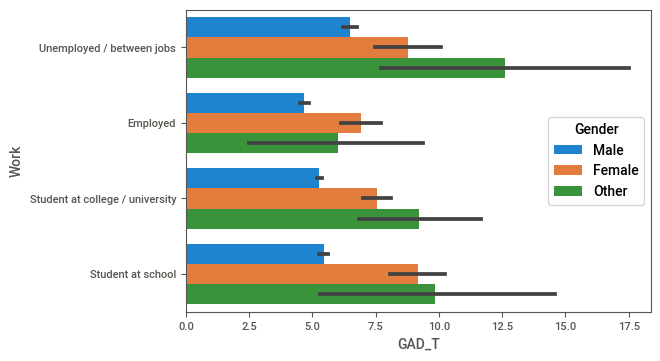

In [214]:
sns.barplot(x='GAD_T',y='Work', data=Gaming_Final, 
            hue='Gender')
plt.show()  #We see a relationship between these factors

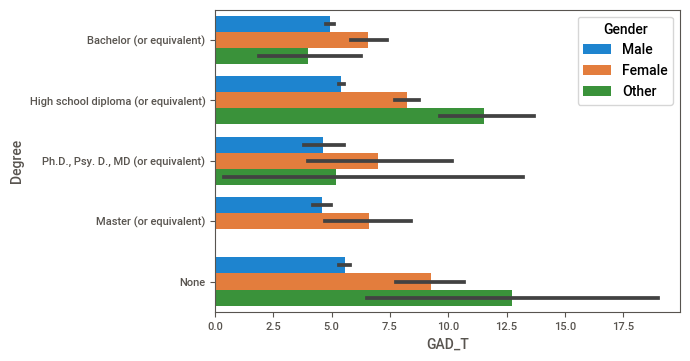

In [215]:
sns.barplot(x='GAD_T',y='Degree', data=Gaming_Final, 
            hue='Gender')
plt.show()  #We see a relationship between these factors

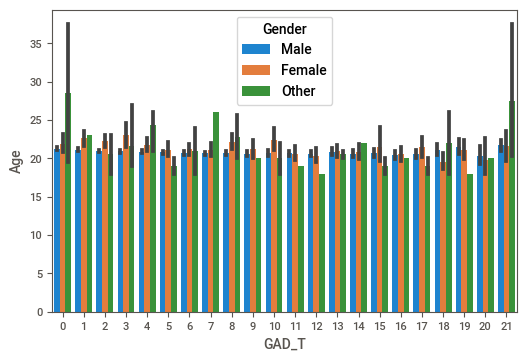

In [216]:
sns.barplot(x='GAD_T',y='Age', data=Gaming_Final, 
            hue='Gender')
plt.show()  #We don't see a relationship between these factors

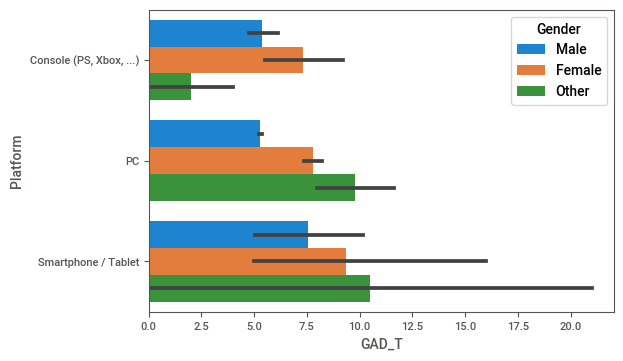

In [217]:
sns.barplot(x='GAD_T',y='Platform', data=Gaming_Final, 
            hue='Gender')
plt.show()   #We see a relationship between these factors

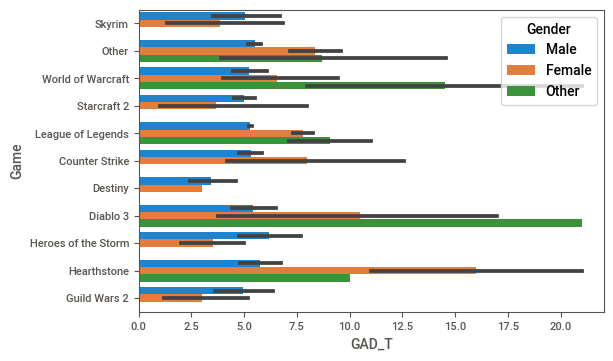

In [218]:
sns.barplot(x='GAD_T',y='Game', data=Gaming_Final, 
            hue='Gender')
plt.show()    #We don't see a relationship between these factors

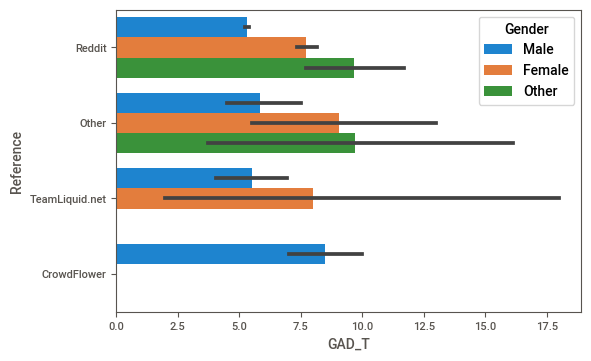

In [219]:
sns.barplot(x='GAD_T',y='Reference', data=Gaming_Final, 
            hue='Gender')
plt.show() #We see somewhat of a relationship between these factors

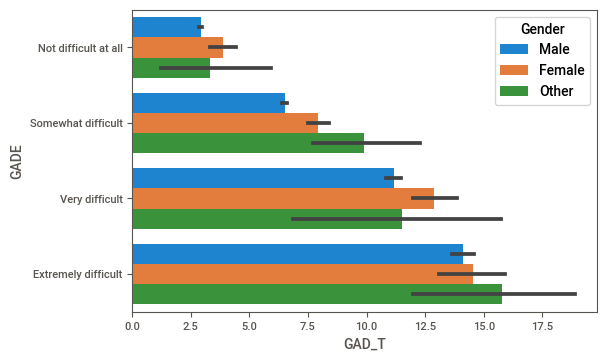

In [220]:
sns.barplot(x='GAD_T',y='GADE', data=Gaming_Final, 
            hue='Gender')
plt.show()    #We see a relationship between these factors

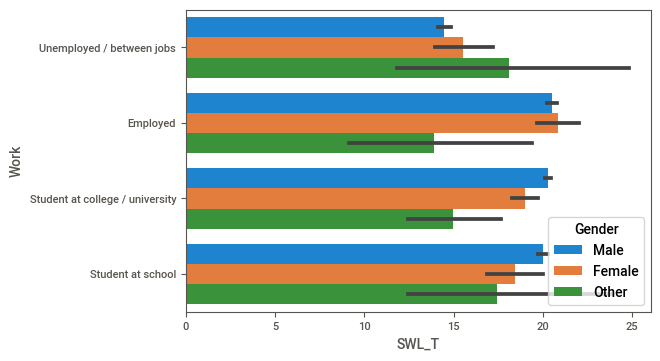

In [221]:
sns.barplot(x='SWL_T',y='Work', data=Gaming_Final, 
            hue='Gender')
plt.show()    #We see a relationship between these factors

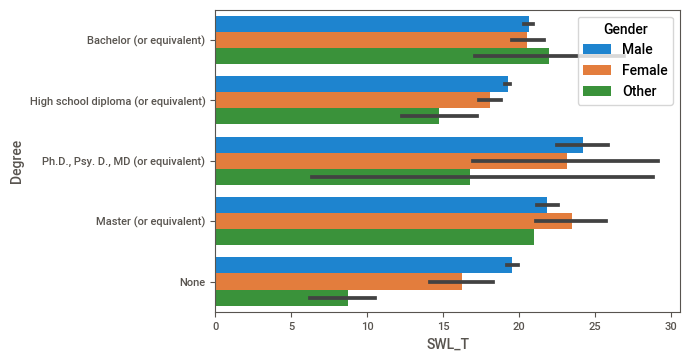

In [222]:
sns.barplot(x='SWL_T',y='Degree', data=Gaming_Final, 
            hue='Gender')
plt.show()   #We see a relationship between these factors

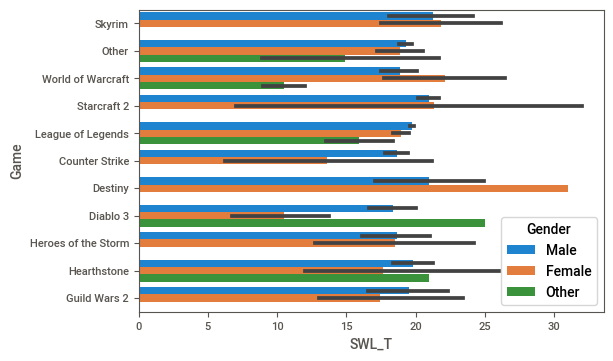

In [223]:
sns.barplot(x='SWL_T',y='Game', data=Gaming_Final, 
            hue='Gender')
plt.show()   #We don't see a relationship between these factors

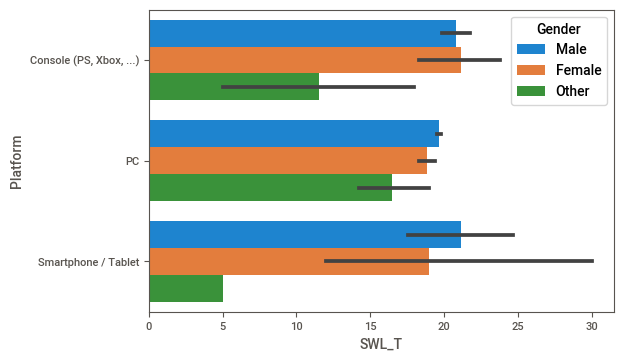

In [224]:
sns.barplot(x='SWL_T',y='Platform', data=Gaming_Final, 
            hue='Gender')
plt.show()   #We see a relationship between these factors

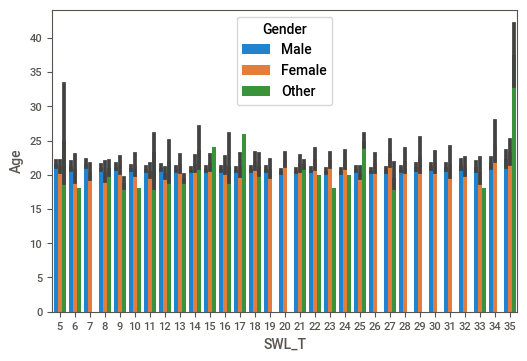

In [225]:
sns.barplot(x='SWL_T',y='Age', data=Gaming_Final, 
            hue='Gender')
plt.show()   #We don't see a relationship between these factors

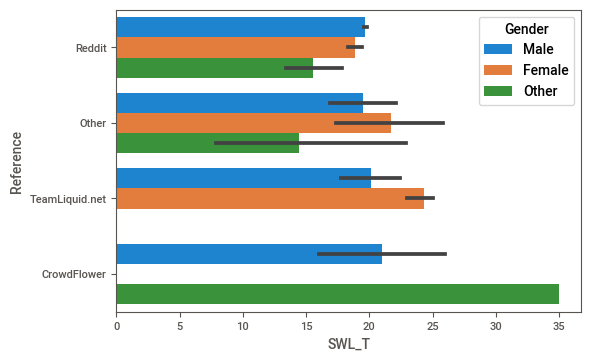

In [226]:
sns.barplot(x='SWL_T',y='Reference', data=Gaming_Final, 
            hue='Gender')
plt.show() #We see a relative relationship between these factors

## Graphics for Final Presentation

In [227]:
Gaming_Final.rename(columns={'SWL_T': 'SWL Total', 'GAD_T': 'GAD Total'}, inplace=True)

C:\Users\Sgallego\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:xlabel='Gender Group', ylabel='GAD Total'>

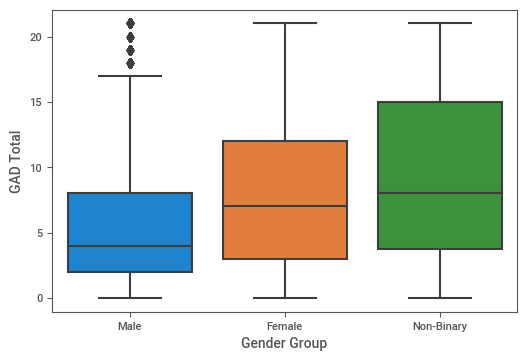

In [228]:
sns.boxplot(data=Gaming_Final, x="Gender Group", y="GAD Total")

<AxesSubplot:xlabel='Work', ylabel='GAD Total'>

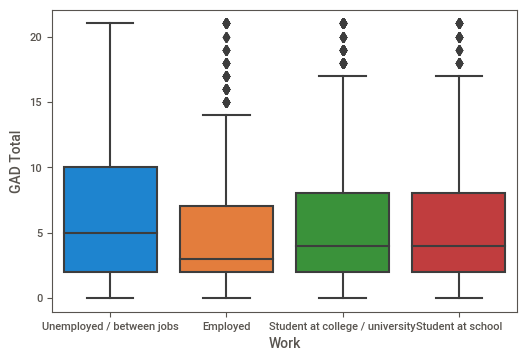

In [229]:
sns.boxplot(data=Gaming_Final, x="Work", y="GAD Total")

<AxesSubplot:xlabel='GAD Total', ylabel='Degree'>

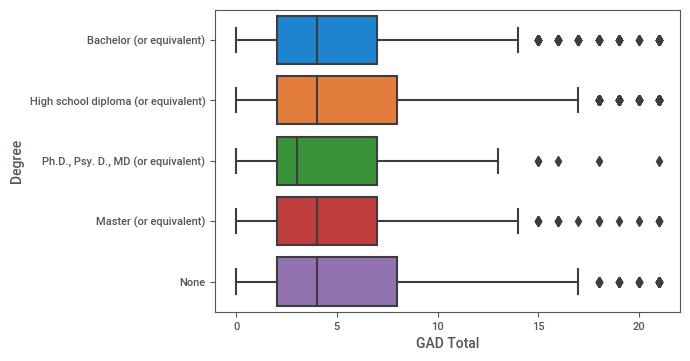

In [230]:
sns.boxplot(data=Gaming_Final, x="GAD Total", y="Degree")

<AxesSubplot:xlabel='GAD Total', ylabel='Platform'>

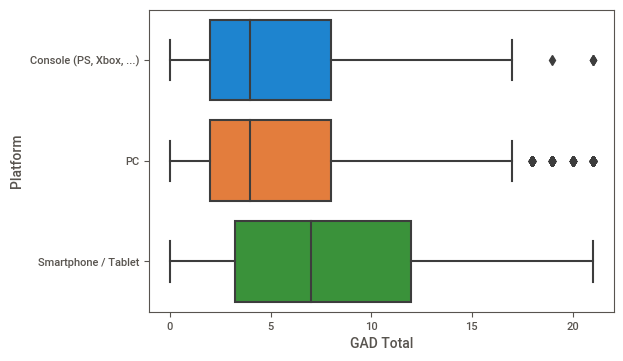

In [231]:
sns.boxplot(data=Gaming_Final, x="GAD Total", y="Platform")

<AxesSubplot:xlabel='Gender Group', ylabel='Age'>

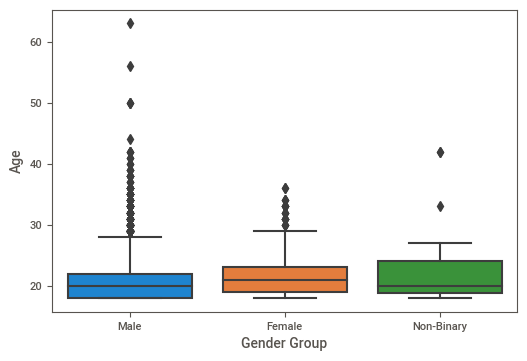

In [232]:
sns.boxplot(data=Gaming_Final, x="Gender Group", y="Age")

In [233]:
Gaming_Final.to_csv('out.csv')
Gaming_Final.to_csv(r'C:\Users\Sgallego\Documents\DataScience\DataScienceCourse\10.FinalProject\Week6\out.csv', index = False)